# 1. Import Libraries

In [1]:
# Install necessary packages
!pip install calmap duckdb sweetviz pygwalker xgboost pydot visualkeras graphviz lifelines pyarrow feather-format

In [2]:
# Basic libraries
import numpy as np
from numpy import inf
import pandas as pd
import warnings
from datetime import datetime

# Machine Learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, fbeta_score, mean_squared_error, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score,recall_score

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import calmap

# Other libraries
import requests
import tabulate
from scipy import stats
from scipy.stats import norm
import duckdb
import time
colors = ['#66b3ff', '#ff9999']

# Plotly offline mode
pyo.init_notebook_mode(connected=True)

# Set the warning filter to ignore
warnings.filterwarnings("ignore")

# Set the display options
pd.options.display.max_columns = None

# Set the color palette
sns.set_palette(sns.color_palette())

# Set a random seed at the beginning of your script
np.random.seed(42)


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, RFE, SelectPercentile
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
import matplotlib.patches as mpatches
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from scipy.stats import chi2

# 2. Explore The Data 

## Convert .csv files into pandas DataFrame.

In [4]:
# Reads a CSV file into a pandas DataFrame
dataframe = pd.read_csv("C:\\Users\\lekho\\Work\\FraudDetection\\Data\\Accelerationdata.csv")
datalock = pd.read_csv("C:\\Users\\lekho\\Work\\FraudDetection\\Data\\lock_user.csv")
# fpd_accum = pd.read_csv("C:\\Users\\lekho\\OneDrive\Máy tính\\fizo-it-team\\Score Ver 4.0\\fpd_accum.csv")
# Generating the dataframe
df = pd.DataFrame(dataframe)
df_lock = pd.DataFrame(datalock)
# fpd_accum = pd.DataFrame(fpd_accum)


## Check for NA value

In [5]:
# Glimpse NA % df
data_df = df
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,velocity_outSideApp_cnt_28d,velocity_outSideApp_cnt_14d,velocity_outSideApp_cnt_7d,velocity_outSideAppPermanent_cnt_28d,velocity_outSideAppPermanent_cnt_14d,velocity_outSideAppPermanent_cnt_7d,velocity_60d,mean_distance_sellOrg7d,velocity_28d,mean_distance_sellOrg14d,velocity_14d,mean_distance_sellOrg28d,velocity_7d,velocity_3d,region_tier,approve_cnt_28d,BAD_lock,MONTH,acceleration_14d,acceleration_3d,app_cnt_60d,app_cnt_28d,app_cnt_14d,acceleration_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,acceleration_28d,outSideApp_cnt_1d,acceleration_outSideAppPermanent_cnt_14d,acceleration_outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_1d,acceleration_outSideApp_28d,acceleration_outSideApp_14d,acceleration_outSideApp_7d,amt30_cnt_28d,acceleration_60d,avg_distance_sellerProvince_locationCreate_km_28d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,app_cnt_3d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,app_cnt_7d,idcard_cnt_28d,app_cnt_1d,outSideAppPermanent_cnt_28d,phoneTrigger_cnt_7d,idTrigger_cnt_28d,idTrigger_cnt_14d,idTrigger_cnt_7d,term_permanent_flag_cnt_28d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_7d,outSideAppPermanent_cnt_14d,refphone_cnt_28d,outSideAppPermanent_cnt_7d,outSideApp_cnt_28d,outSideApp_cnt_14d,outSideApp_cnt_7d,stable_and_self_employed_rate_cnt_28d,vnpostUserName,vnpostProvinceName,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,loan_date,male_cnt_28d,nonViettel_cnt_28d,Single_cnt_28d,idcard_rej_cnt_28d,addressTrigger_cnt_28d,addressTrigger_cnt_14d,addressTrigger_cnt_7d,emailTrigger_cnt_28d,emailTrigger_cnt_14d,emailTrigger_cnt_7d,createTimeTrigger_cnt_28d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_7d,userTriggerNew_cnt_28d,acceleration_outSideAppPermanent_cnt_28d
Total,167425.000000,166196.000000,165415.00000,161933.000000,159841.000000,158954.000000,148608.000000,120274.000000,115045.000000,111674.000000,107157.000000,106217.000000,105685.000000,103586.00000,3295.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,98.474867,97.752003,97.29264,95.244621,94.014163,93.492454,87.407216,70.741921,67.666365,65.683633,63.026856,62.473973,62.161065,60.92649,1.93803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Glimpse NA % datalock
data_df = datalock
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,lock_date,UserName,lock_time
Total,0.0,0.0,0.0
Percent,0.0,0.0,0.0


In [7]:
# # Glimpse NA % fpd_accum
# data_df = fpd_accum
# total = data_df.isnull().sum().sort_values(ascending = False)
# percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
# pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

## Merge dataframes together

Glimpse Dataframe

In [8]:
# # Function to display the first row of a dataframe
# def display_first_row(df, name):
#     print(f"First row of {name}:")
#     display(df.head(1))
#     print("\n")  # Adds a newline for better readability between outputs

# # List of tuples containing the dataframes and their respective names
# dataframes = [(df, 'df'), (df_lock, 'df_lock'), (fpd_accum, 'fpd_accum')]

# # Loop through each dataframe and display its first row
# for dataframe, name in dataframes:
#     display_first_row(dataframe, name)

### Map the Lock dataframe with the performance dataframe

In [9]:
# Drop Province
df = df.drop(['vnpostProvinceName'], axis=1)

# Step 1: Convert columns to datetime
df['loan_date'] = pd.to_datetime(df['loan_date'])
df_lock['lock_date'] = pd.to_datetime(df_lock['lock_date'])
# fpd_accum['day'] = pd.to_datetime(fpd_accum['day'])

# Prepare for the customized left join
result_rows = []

# Step 2: Iterate through each row in the 'df' dataframe
for _, row in df.iterrows():
    start_date = row['loan_date'] - pd.Timedelta(days=30)
    end_date = row['loan_date'] + pd.Timedelta(days=30)

    mask = (
        (df_lock['lock_date'] >= start_date) & 
        (df_lock['lock_date'] <= end_date) & 
        (df_lock['UserName'] == row['vnpostUserName'])
    )
    filtered_df_lock = df_lock.loc[mask]

    # If there are matches, we combine the data
    if not filtered_df_lock.empty:
        for _, matched_row in filtered_df_lock.iterrows():
            combined_data = row.combine_first(matched_row)
            result_rows.append(combined_data)
    else:
        # No match, keep the original row
        result_rows.append(row)

# Step 3: Create the combined dataframe
result_df = pd.DataFrame(result_rows)

# Step 4: Create the 'BAD' column based on 'lock_time' and FPD conditions
def check_bad_conditions(row):
    # Conditions related to 'lock_time'
    lock_time_condition = row['lock_time'] > 0 if row['lock_time'] is not None else False
    
    # Conditions related to FPD (First Payment Default)
    fpd_conditions = [
    ]

    # If any of the conditions are met, mark as 'BAD'
    return 1 if lock_time_condition or any(fpd_conditions) else 0

result_df['BAD'] = result_df.apply(check_bad_conditions, axis=1)

# Optional: If you wish to remove certain columns like 'lock_date' and 'UserName', you can do so.
final_df = result_df.drop(['lock_date', 'UserName'], axis=1)

df = final_df

In [10]:
# fpd_accum.rename(columns={'day': 'loan_date'}, inplace=True)
# merged_df = pd.merge(final_df, fpd_accum, on=['vnpostUserName', 'loan_date'], how='left')
# merged_df['loan_date'] = pd.to_datetime(merged_df['loan_date']).dt.strftime('%d-%m-%Y')
# merged_df.head(1)

### Define 'BAD'

In [11]:
def set_bad_flag(row):
    # Existing condition related to 'lock_time'.
    lock_time_condition = row['lock_time'] > 0 if 'lock_time' in row and row['lock_time'] is not None else False
    
    # New condition based on 'cumulative_fpd_rate'.
    # fpd_rate_condition = row['cumulative_fpd_rate'] >= 5 if 'cumulative_fpd_rate' in row and row['cumulative_fpd_rate'] is not None else False

    # If any of the conditions are met, the entry is "BAD".
    return 1 if lock_time_condition else 0

In [12]:
# # Apply the function to each row in 'merged_df'
# merged_df['BAD'] = merged_df.apply(set_bad_flag, axis=1)
# df = merged_df
# df.head()

# Apply the function to each row in 'merged_df'
df['BAD'] = df.apply(set_bad_flag, axis=1)
df = df
df.head()

,MONTH,loan_date,region_tier,vnpostUserName,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,idcard_rej_cnt_28d,Single_cnt_28d,nonViettel_cnt_28d,male_cnt_28d,idcard_cnt_28d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_28d,BAD_lock,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,amt30_cnt_28d,outSideApp_cnt_1d,velocity_outSideApp_cnt_7d,velocity_outSideApp_cnt_14d,velocity_outSideApp_cnt_28d,acceleration_outSideApp_7d,acceleration_outSideApp_14d,acceleration_outSideApp_28d,outSideAppPermanent_cnt_1d,velocity_outSideAppPermanent_cnt_7d,velocity_outSideAppPermanent_cnt_14d,velocity_outSideAppPermanent_cnt_28d,acceleration_outSideAppPermanent_cnt_7d,acceleration_outSideAppPermanent_cnt_14d,acceleration_outSideAppPermanent_cnt_28d,lock_time,BAD
0,2023-03,2023-03-04 00:00:00+00:00,TIER_3,hanhnh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,16,0,7,13,18,18,4,8,11,18,18,18,1.333333,-1.333333,2.0,4.0,4.0,NaN,1,1,-1.000000,-1.000000,-0.500000,-0.233333,0.000000,0.000000,0.000000,0.0,0.0,0.0,2,0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0
1,2023-01,2023-01-30 00:00:00+00:00,TIER_3,gdv.duyntl,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,3,2,3,2,3,3,0,0,0,1,3,3,NaN,0.000000,NaN,NaN,NaN,NaN,0,0,0.000000,-0.071429,-0.107143,-0.050000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0
2,2022-12,2022-12-29 00:00:00+00:00,TIER_3,33.0108,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,0,0,0,NaN,NaN,NaN,2,1,0,2,5,5,0,3,5,5,5,5,0.000000,-1.000000,0.0,NaN,NaN,NaN,1,1,-0.714286,-0.357143,-0.178571,-0.083333,0.000000,0.000000,0.000000,0.0,0.0,0.0,2,0,NaN,NaN,NaN,-0.142857,-0.071429,-0.035714,0,NaN,NaN,NaN,-0.142857,-0.071429,-0.035714,1.0,1
3,2023-05,2023-05-04 00:00:00+00:00,TIER_3,88.0969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,4.5,4.5,8,3,3,4,8,8,0,0,6,8,8,8,NaN,0.000000,0.0,0.0,NaN,NaN,0,0,-0.857143,-0.571429,-0.285714,-0.133333,4.235294,4.235294,4.235294,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0
4,2022-11,2022-11-22 00:00:00+00:00,TIER_3,59.0275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0,0,1,1,0,0,0,1,1,1,NaN,0.000000,NaN,NaN,NaN,NaN,0,0,0.000000,-0.071429,-0.035714,-0.016667,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0


In [13]:
# Create a list of FPD related columns to drop
fpd_cols_to_drop = [col for col in df.columns if 'FPD' in col]

# Drop those columns
df = df.drop(fpd_cols_to_drop, axis=1)

In [14]:
# Characteristic variable isolation
# Fill 0
spe_num = df.select_dtypes(['float', 'int']).columns
df[spe_num] = df[spe_num].apply(lambda x: x.fillna(0), axis=0)
# Fill missing values
spe_obj = df.select_dtypes(['object']).columns
df[spe_obj] = df[spe_obj].apply(lambda x: x.fillna('Null'), axis=0)

In [15]:
df = df.drop(['lock_time', 'BAD_lock'], axis=1)

In [16]:
cols_to_drop = df.filter(like='TIER').columns
df = df.drop(cols_to_drop, axis=1)

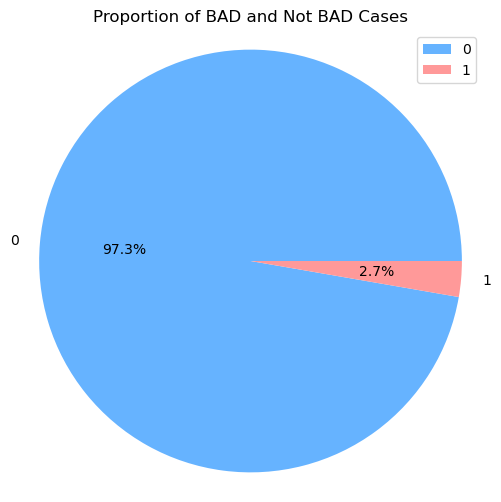

In [17]:
# Creating a copy
counts = df['BAD'].value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.axis('equal')
plt.title('Proportion of BAD and Not BAD Cases')
plt.legend()
plt.show()

In [18]:
# from sklearn.preprocessing import RobustScaler

numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# scaler = RobustScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

loan_data = df
data = df

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170018 entries, 0 to 170017
Data columns (total 80 columns):
 #   Column                                             Non-Null Count   Dtype              
---  ------                                             --------------   -----              
 0   MONTH                                              170018 non-null  object             
 1   loan_date                                          170018 non-null  datetime64[ns, UTC]
 2   region_tier                                        170018 non-null  object             
 3   vnpostUserName                                     170018 non-null  object             
 4   stable_and_self_employed_rate_cnt_28d              170018 non-null  int64              
 5   outSideApp_cnt_7d                                  170018 non-null  int64              
 6   outSideApp_cnt_14d                                 170018 non-null  int64              
 7   outSideApp_cnt_28d                             

In [20]:
df.describe()

,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,idcard_rej_cnt_28d,Single_cnt_28d,nonViettel_cnt_28d,male_cnt_28d,idcard_cnt_28d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_28d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,amt30_cnt_28d,outSideApp_cnt_1d,velocity_outSideApp_cnt_7d,velocity_outSideApp_cnt_14d,velocity_outSideApp_cnt_28d,acceleration_outSideApp_7d,acceleration_outSideApp_14d,acceleration_outSideApp_28d,outSideAppPermanent_cnt_1d,velocity_outSideAppPermanent_cnt_7d,velocity_outSideAppPermanent_cnt_14d,velocity_outSideAppPermanent_cnt_28d,acceleration_outSideAppPermanent_cnt_7d,acceleration_outSideAppPermanent_cnt_14d,acceleration_outSideAppPermanent_cnt_28d,BAD
count,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.00000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000,170018.000000
mean,6.988054,0.419197,0.678011,1.079727,1.039702,1.734281,2.772401,0.737598,1.251744,2.014993,0.039419,0.070610,0.125269,0.01394,0.025450,0.045883,0.060529,0.098713,0.151725,0.047436,0.079550,0.136915,0.445588,0.774889,1.307326,0.089908,0.152090,0.241780,1.588937,1.766770,1.870008,10.133104,2.469662,4.984531,6.558917,13.481984,13.367120,0.844146,2.216595,4.684457,8.328836,14.611000,14.611000,0.419863,-0.457483,0.430883,0.438391,0.418462,0.301863,2.946735,-0.548616,-0.534621,-0.491673,-0.229448,0.669495,1.074088,1.695383,0.841651,1.370256,2.230086,2.051994,0.088632,0.166807,0.255837,0.352122,-0.047224,-0.042098,-0.035396,0.202820,0.411302,0.716750,1.144780,-0.119555,-0.109390,-0.091771,0.027279
std,16.150482,2.225391,3.162256,4.455664,4.552510,7.384981,11.221998,3.953069,6.599659,10.131228,0.223856,0.313366,0.435071,0.13845,0.193971,0.268524,0.437001,0.661828,0.948915,0.417200,0.649008,1.054999,2.917338,4.949602,7.975093,0.582206,0.924448,1.342871,18.206203,18.707394,18.633573,16.038430,5.430368,9.006064,11.355715,19.759686,19.601611,1.756269,3.876144,7.485637,12.672275,21.009898,21.009898,0.795385,0.897

# Time Factor

In [21]:
# Convert the date column to a datetime type if it isn't already
df['loan_date'] = pd.to_datetime(df['loan_date'])

# Extracting features
df['day_of_week'] = df['loan_date'].dt.dayofweek
df['day_of_month'] = df['loan_date'].dt.day
df['month'] = df['loan_date'].dt.month
df['quarter'] = df['loan_date'].dt.quarter
df['year'] = df['loan_date'].dt.year


# Temporal Analysis

In [22]:
# Sort by 'vnpostUserName' and 'loan_date'
df = df.sort_values(by=['vnpostUserName', 'loan_date'])

# Calculate the difference in days since the last activity
df['days_since_last_activity'] = df.groupby('vnpostUserName')['loan_date'].diff().dt.days

# Fill NaN values with some default value or 0 (since for the first record of each user, there won't be a previous activity)
df['days_since_last_activity'].fillna(0, inplace=True)

In [23]:
# Set the datetime column as the index if you want to perform time-series analysis
df.set_index('loan_date', inplace=True)

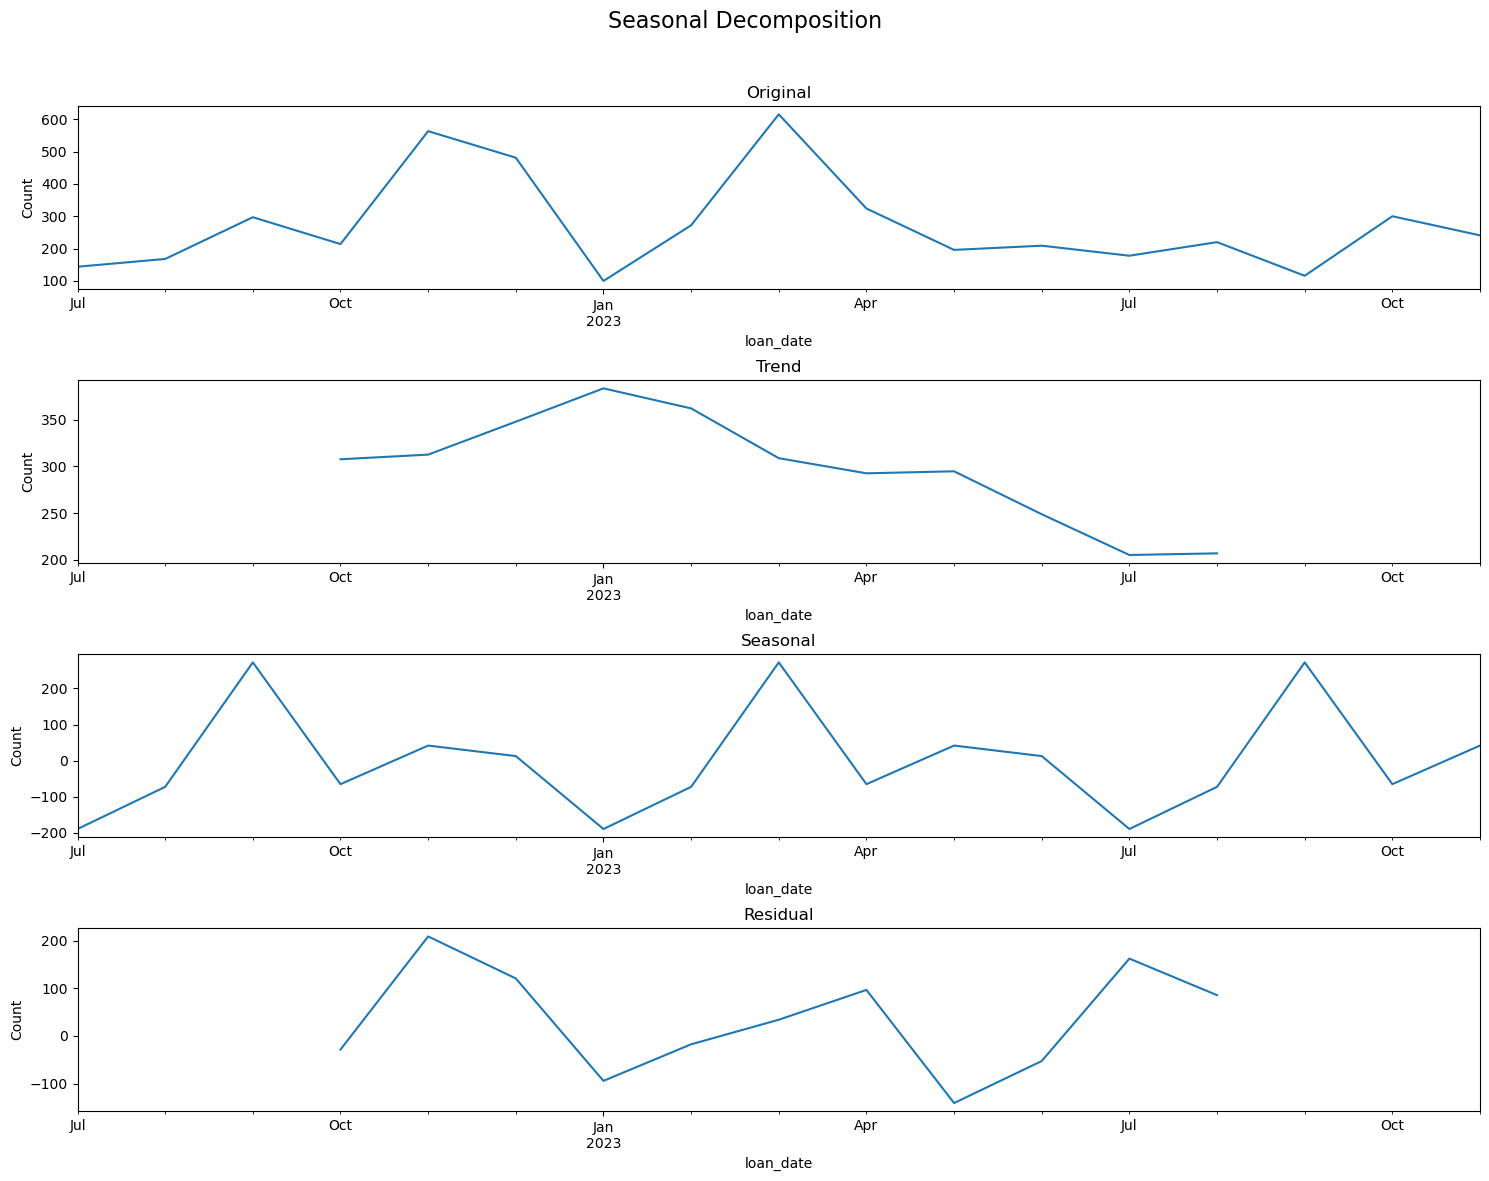

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ensure that 'df' has a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    print("The DataFrame index must be a DatetimeIndex.")
    # If 'date' is your column with datetime, then set it as index
    # df.set_index('date', inplace=True)

# Check if the data contains any NaNs, as the decomposition function may not handle them well
if df['BAD'].isna().any():
    print("Warning: NaN values found. They will be filled or dropped.")
    # You can choose either to fill NaNs or drop them:
    # df['BAD'].fillna(method='ffill', inplace=True)  # forward-fill
    df.dropna(subset=['BAD'], inplace=True)  # or drop rows with NaNs

# Resample data to a regular period, summing 'BAD' counts for each month
y = df['BAD'].resample('M').sum()

# Check if we have enough data points after resampling
if len(y) < 12:
    print(f"Warning: Not enough data points for seasonal decomposition after resampling ({len(y)} points). Seasonal decomposition requires multiple complete cycles.")

# Perform seasonal decomposition
try:
    # Assuming a known seasonality period of 6 months
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=6)

    # Plot the decomposed time series components
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    fig.suptitle('Seasonal Decomposition', fontsize=16)

    # Plot the original data
    y.plot(ax=ax1, title='Original')
    ax1.set_ylabel('Count')

    # Plot the trend component
    decomposition.trend.plot(ax=ax2, title='Trend')
    ax2.set_ylabel('Count')

    # Plot the seasonal component
    decomposition.seasonal.plot(ax=ax3, title='Seasonal')
    ax3.set_ylabel('Count')

    # Plot the residual component
    decomposition.resid.plot(ax=ax4, title='Residual')
    ax4.set_ylabel('Count')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

except ValueError as e:
    print(f"An error occurred during seasonal decomposition: {e}")


In [25]:
# This resets the index to the default integer index.
df = df.reset_index(drop=True)
df_1 = df
df.head()

,MONTH,region_tier,vnpostUserName,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,idcard_rej_cnt_28d,Single_cnt_28d,nonViettel_cnt_28d,male_cnt_28d,idcard_cnt_28d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_28d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,amt30_cnt_28d,outSideApp_cnt_1d,velocity_outSideApp_cnt_7d,velocity_outSideApp_cnt_14d,velocity_outSideApp_cnt_28d,acceleration_outSideApp_7d,acceleration_outSideApp_14d,acceleration_outSideApp_28d,outSideAppPermanent_cnt_1d,velocity_outSideAppPermanent_cnt_7d,velocity_outSideAppPermanent_cnt_14d,velocity_outSideAppPermanent_cnt_28d,acceleration_outSideAppPermanent_cnt_7d,acceleration_outSideAppPermanent_cnt_14d,acceleration_outSideAppPermanent_cnt_28d,BAD,day_of_week,day_of_month,month,quarter,year,days_since_last_activity
0,2022-11,TIER_1,00099806,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-0.035714,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,2,2,11,4,2022,0.0
1,2022-11,TIER_1,00099806,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-0.035714,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,3,17,11,4,2022,15.0
2,2022-11,TIER_1,00099806,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,2,2,2,2,0,1,1,1,2,2,0.0,-0.333333,0.0,0.0,0.0,0.0,1,-0.142857,-0.071429,-0.071429,-0.033333,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,5,19,11,4,2022,2.0
3,2022-11,TIER_1,00099806,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,0,3,3,3,3,0,0,1,2,3,3,0.0,0.000000,0.0,0.0,0.0,0.0,1,-0.142857,-0.142857,-0.107143,-0.050000,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,4,25,11,4,2022,6.0
4,2022-11,TIER_1,00099806,4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,1,4,4,4,4,0,0,1,3,4,4,0.0,0.000000,0.0,0.0,0.0,0.0,1,-0.142857,-0.214286,-0.142857,-0.066667,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,-0.142857,-0.071429,-0.035714,0,0.0,0.0,0.0,-0.142857,-0.071429,-0.035714,0,1,29,11,4,2022,4.0


In [26]:
# # Separate continuous and discrete variables
# cont_vars = []
# disc_vars = []
# for col in data.columns:
#     if data[col].dtype in ['object'] and data[col].nunique() < 15:
#         disc_vars.append(col)
#     elif data[col].dtype in ['float64', 'int64']:
#         cont_vars.append(col)

# # Histogram
# def _plot_hist_subplot(x, fieldname, bins=10, use_kde=True):
#     x = x.dropna()
#     xlabel = '{} bins tickers'.format(fieldname)
#     ylabel = 'Count obs in {} each bin'.format(fieldname)
#     title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
#     ax = sns.distplot(x, bins=bins, kde=use_kde)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     ax.set_title(title)
#     return ax

# # Barchart
# def _plot_barchart_subplot(x, fieldname):
#     xlabel = 'Group of {}'.format(fieldname)
#     ylabel = 'Count obs in {} each bin'.format(fieldname)
#     title = 'Barchart plot of {}'.format(fieldname)
#     x = x.fillna('Missing')
#     df_summary = x.value_counts(dropna=False)
#     y_values = df_summary.values
#     x_index = df_summary.index
#     ax = sns.barplot(x=x_index, y=y_values, order=x_index)

#     # Create a ring for taking the top peak coordinates of the chart and add labels through the annotate.
#     labels = list(set(x))
#     for label, p in zip(y_values, ax.patches):
#         ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     return ax

# # Determine the number of rows and columns for the grid
# num_vars = len(cont_vars) + len(disc_vars)
# num_rows = (num_vars - 1) // 3 + 1  # 3 columns
# num_cols = min(num_vars, 3)

# # Initialize the figure for the graph
# fig = plt.figure(figsize=(18, 6*num_rows))
# fig.subplots_adjust(hspace=0.5, wspace=0.2)

# # Create a plot for continuous variables
# for i, cont_var in enumerate(cont_vars):
#     ax_i = fig.add_subplot(num_rows, num_cols, i+1)
#     ax_i = _plot_hist_subplot(data[cont_var], fieldname=cont_var)

# # Create a plot for discrete variables
# for i, disc_var in enumerate(disc_vars):
#     ax_i = fig.add_subplot(num_rows, num_cols, len(cont_vars)+i+1)
#     ax_i = _plot_barchart_subplot(data[disc_var], fieldname=disc_var)

# fig.suptitle('Visualization all fields')
# plt.show()


In [27]:
# Get a list of all column names
all_columns = df_1.columns.tolist()

# Columns to exclude
exclude_columns = ["vnpostUserName", "BAD", "MONTH"]

# Get the final list of columns by excluding the specified columns
model_features = [col for col in all_columns if col not in exclude_columns]

In [28]:
# df = pd.concat([before_2022_12, out_of_time_sample], ignore_index=True)

#  3.Feature Engineering

In [29]:
X = df_1[model_features]
y = df_1['BAD']
X.head()

,region_tier,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,idcard_rej_cnt_28d,Single_cnt_28d,nonViettel_cnt_28d,male_cnt_28d,idcard_cnt_28d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_28d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,amt30_cnt_28d,outSideApp_cnt_1d,velocity_outSideApp_cnt_7d,velocity_outSideApp_cnt_14d,velocity_outSideApp_cnt_28d,acceleration_outSideApp_7d,acceleration_outSideApp_14d,acceleration_outSideApp_28d,outSideAppPermanent_cnt_1d,velocity_outSideAppPermanent_cnt_7d,velocity_outSideAppPermanent_cnt_14d,velocity_outSideAppPermanent_cnt_28d,acceleration_outSideAppPermanent_cnt_7d,acceleration_outSideAppPermanent_cnt_14d,acceleration_outSideAppPermanent_cnt_28d,day_of_week,day_of_month,month,quarter,year,days_since_last_activity
0,TIER_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-0.035714,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,2,11,4,2022,0.0
1,TIER_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-0.035714,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3,17,11,4,2022,15.0
2,TIER_1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,2,2,2,2,0,1,1,1,2,2,0.0,-0.333333,0.0,0.0,0.0,0.0,1,-0.142857,-0.071429,-0.071429,-0.033333,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,5,19,11,4,2022,2.0
3,TIER_1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,0,3,3,3,3,0,0,1,2,3,3,0.0,0.000000,0.0,0.0,0.0,0.0,1,-0.142857,-0.142857,-0.107143,-0.050000,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4,25,11,4,2022,6.0
4,TIER_1,4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,1,4,4,4,4,0,0,1,3,4,4,0.0,0.000000,0.0,0.0,0.0,0.0,1,-0.142857,-0.214286,-0.142857,-0.066667,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,-0.142857,-0.071429,-0.035714,0,0.0,0.0,0.0,-0.142857,-0.071429,-0.035714,1,29,11,4,2022,4.0


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33067
           1       0.91      0.33      0.48       937

    accuracy                           0.98     34004
   macro avg       0.94      0.66      0.74     34004
weighted avg       0.98      0.98      0.98     34004



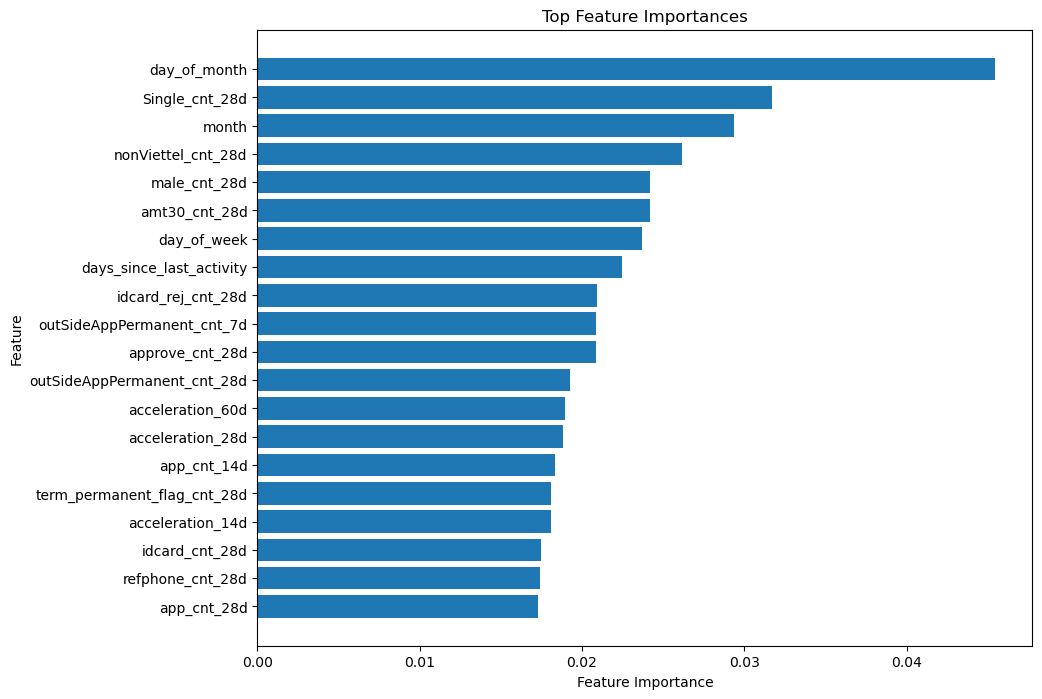

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numeric_cols = X_train.select_dtypes(include=['int', 'float']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that combines the preprocessor with a random forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Retrieve the feature importances from the fitted RandomForest model
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Get the feature names after one-hot encoding
feature_names_transformed = numeric_cols.tolist() + \
    list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

# Create a dictionary of feature names and their corresponding importance scores
feature_importance_dict = dict(zip(feature_names_transformed, feature_importances))

# Select a subset of most important features (for example, the top 20)
n_top_features = 20
top_features = sorted(feature_importance_dict, key=feature_importance_dict.get, reverse=True)[:n_top_features]
top_importances = [feature_importance_dict[feature] for feature in top_features]

# Visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(np.arange(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.title('Top Feature Importances')
plt.show()

In [31]:
loan_data =  pd.concat([X, y], axis=1)

In [32]:
loan_data.head()

,region_tier,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,idcard_rej_cnt_28d,Single_cnt_28d,nonViettel_cnt_28d,male_cnt_28d,idcard_cnt_28d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_28d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,amt30_cnt_28d,outSideApp_cnt_1d,velocity_outSideApp_cnt_7d,velocity_outSideApp_cnt_14d,velocity_outSideApp_cnt_28d,acceleration_outSideApp_7d,acceleration_outSideApp_14d,acceleration_outSideApp_28d,outSideAppPermanent_cnt_1d,velocity_outSideAppPermanent_cnt_7d,velocity_outSideAppPermanent_cnt_14d,velocity_outSideAppPermanent_cnt_28d,acceleration_outSideAppPermanent_cnt_7d,acceleration_outSideAppPermanent_cnt_14d,acceleration_outSideAppPermanent_cnt_28d,day_of_week,day_of_month,month,quarter,year,days_since_last_activity,BAD
0,TIER_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-0.035714,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,2,11,4,2022,0.0,0
1,TIER_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-0.035714,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3,17,11,4,2022,15.0,0
2,TIER_1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,2,2,2,2,0,1,1,1,2,2,0.0,-0.333333,0.0,0.0,0.0,0.0,1,-0.142857,-0.071429,-0.071429,-0.033333,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,5,19,11,4,2022,2.0,0
3,TIER_1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,0,3,3,3,3,0,0,1,2,3,3,0.0,0.000000,0.0,0.0,0.0,0.0,1,-0.142857,-0.142857,-0.107143,-0.050000,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4,25,11,4,2022,6.0,0
4,TIER_1,4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,1,4,4,4,4,0,0,1,3,4,4,0.0,0.000000,0.0,0.0,0.0,0.0,1,-0.142857,-0.214286,-0.142857,-0.066667,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,-0.142857,-0.071429,-0.035714,0,0.0,0.0,0.0,-0.142857,-0.071429,-0.035714,1,29,11,4,2022,4.0,0


# Weigth of Evidence

## Function definitions

In [33]:
def woe_discrete(df_input, variable_name):
    df = df_input[[variable_name, 'BAD']]
    df = pd.concat([df.groupby(variable_name, as_index = False)['BAD'].count(),
                    df.groupby(variable_name, as_index = False)['BAD'].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [variable_name, 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE']).reset_index(drop = True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    if (df['IV'][0] == -np.inf) or (df['IV'][0] == np.inf):
        extreme = set(df[(df['WoE'] > -np.inf) & (df['WoE'] < np.inf)][variable_name])
        df_input_new = df_input[df_input[variable_name].isin(extreme)]
        df['IV_adjusted'] = woe_discrete(df_input_new, variable_name)['IV'][0]
    else:
        df['IV_adjusted'] = df['IV']
    return df

In [34]:
def woe_continuous_best_class_count(df_input, variable_name, class_count_bounds = [3, 30]):
    candidate_class_counts = list(range(class_count_bounds[0], class_count_bounds[1]))

    # Generate bins for each candidate class count
    candidate_bins = [pd.qcut(df_input[variable_name], q=count, duplicates='drop', retbins=True) 
                      for count in candidate_class_counts]

    # Calculate WoE and IV for each binning scheme
    IV_adjusted_list = [woe_discrete(pd.DataFrame({variable_name: bins[0], 'BAD': df_input['BAD']}), variable_name)['IV_adjusted'][0] 
                        for bins in candidate_bins]

    # Find best class count
    best_cut = candidate_class_counts[IV_adjusted_list.index(max(IV_adjusted_list))]

    return [best_cut, woe_discrete(pd.DataFrame({variable_name: candidate_bins[best_cut-class_count_bounds[0]][0], 'BAD': df_input['BAD']}), variable_name), candidate_bins[best_cut-class_count_bounds[0]][1]]

In [35]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels=30, figsize=(10, 5)):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    colors = ['red' if val < 0 else 'green' for val in y]  # Assign red color for negative values and green for positive values
    plt.figure(figsize=figsize)
    plt.plot(x, y, marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6)  # Set line color to blue, marker edge color to black, and marker size to 6
    plt.axhline(0, color='k', linestyle='--')  # Add a horizontal line at y=0 for reference
    var_name = df_WoE.columns[0]
    var_IV = df_WoE['IV_adjusted'][0]
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + var_name + ' (IV = ' + str(round(var_IV, 5)) + ')')
    plt.xticks(rotation=rotation_of_x_axis_labels, ha='right')
    plt.subplots_adjust(bottom=0.15)
    
    # Customize legend colors
    handles = [plt.Line2D([], [], marker='o', linestyle='--', color='k', markersize=6),
               plt.Line2D([], [], marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6, markerfacecolor='none')]
    labels = ['y = 0', 'Weight of Evidence']
    plt.legend(handles, labels, loc='best')
    
    # Set custom colors for markers
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.plot(xi, yi, marker='o', color=colors[i], mec='black', mew=1, ms=6)
    
    plt.show()

## Application

### For Discrete variables

In [36]:
# Object columns 
columns_obj = loan_data.select_dtypes(['object']).columns
columns_obj

Index(['region_tier'], dtype='object')

In [37]:
import math
discrete_cols = ['region_tier']
df_discrete = pd.DataFrame(discrete_cols).rename(columns = {0:'DISCRETE_COL'})
df_discrete['DISTINCT'], df_discrete['IV'], df_discrete['IV_ADJUSTED'] = '', '', ''
for i in range(len(df_discrete)):
    col = df_discrete['DISCRETE_COL'][i]
    results = woe_discrete(loan_data, col)
    df_discrete['DISTINCT'][i] = len(results)
    df_discrete['IV'][i] = results['IV'][0]
    df_discrete['IV_ADJUSTED'][i] = results['IV_adjusted'][0]
    print(col, 'done!')
df_discrete = df_discrete.sort_values(['IV_ADJUSTED', 'IV', 'DISTINCT'], ascending = [False, True, True]).reset_index(drop = True)
df_discrete

region_tier done!


,DISCRETE_COL,DISTINCT,IV,IV_ADJUSTED
0,region_tier,4,0.647964,0.647964


In [38]:
# Filter columns based on DISTINCT and IV_ADJUSTED
selected_discrete_cols = []
for i in range(len(df_discrete)):
    if df_discrete['IV_ADJUSTED'][i] > 0 and df_discrete['DISTINCT'][i] < 20:
        selected_discrete_cols.append(df_discrete['DISCRETE_COL'][i])
        
    
print('Selected discrete columns:', selected_discrete_cols)

Selected discrete columns: ['region_tier']


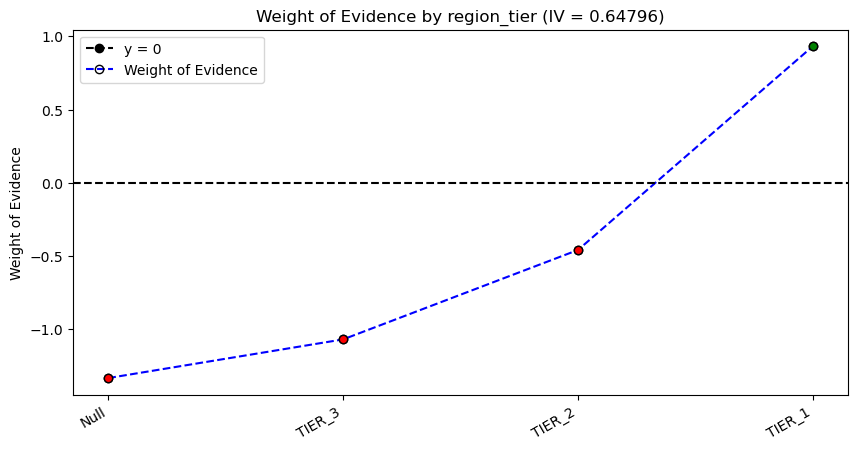

In [39]:
# Sample plot of "total_app_label"
plot_by_woe(woe_discrete(loan_data, 'region_tier'))

## Discretize the continuous

In [40]:
# Continuous columns
columns_num = loan_data[top_features].select_dtypes(['float', 'int']).columns
columns_num

Index(['day_of_month', 'Single_cnt_28d', 'month', 'nonViettel_cnt_28d',
       'male_cnt_28d', 'amt30_cnt_28d', 'day_of_week',
       'days_since_last_activity', 'idcard_rej_cnt_28d',
       'outSideAppPermanent_cnt_7d', 'approve_cnt_28d',
       'outSideAppPermanent_cnt_28d', 'acceleration_60d', 'acceleration_28d',
       'app_cnt_14d', 'term_permanent_flag_cnt_28d', 'acceleration_14d',
       'idcard_cnt_28d', 'refphone_cnt_28d', 'app_cnt_28d'],
      dtype='object')

In [41]:
# Manipulation with continuous variables
pd.options.display.max_rows = None
continuous_cols = [col for col in columns_num if col not in ['month','BAD', 'month_demand','cumulative_fpd_rate','cumulative_fpd','cumulative_app','BAD_lock', 'year']]

df_continuous = pd.DataFrame(continuous_cols).rename(columns = {0:'CONTINUOUS_COL'})
df_continuous['BEST_CUT'], df_continuous['IV'], df_continuous['IV_ADJUSTED'], df_continuous['BINS'] = '', '', '', ''
for i in range(len(df_continuous)):
    col = df_continuous['CONTINUOUS_COL'][i]
    if loan_data[col].max() < 1:
        loan_data[col] = loan_data[col] * 100
    results = woe_continuous_best_class_count(loan_data, col)
    df_continuous.at[i, 'BEST_CUT'] = results[0]
    df_continuous.at[i, 'IV'] = results[1]['IV'][0]
    df_continuous.at[i, 'IV_ADJUSTED'] = results[1]['IV_adjusted'][0]
    df_continuous.at[i, 'BINS'] = results[2]
    print(col, 'done!')

df_continuous = df_continuous.sort_values(['IV_ADJUSTED', 'IV', 'BEST_CUT'], ascending = [False, True, True]).reset_index(drop = True)
df_continuous

day_of_month done!
Single_cnt_28d done!
nonViettel_cnt_28d done!
male_cnt_28d done!
amt30_cnt_28d done!
day_of_week done!
days_since_last_activity done!
idcard_rej_cnt_28d done!
outSideAppPermanent_cnt_7d done!
approve_cnt_28d done!
outSideAppPermanent_cnt_28d done!
acceleration_60d done!
acceleration_28d done!
app_cnt_14d done!
term_permanent_flag_cnt_28d done!
acceleration_14d done!
idcard_cnt_28d done!
refphone_cnt_28d done!
app_cnt_28d done!


,CONTINUOUS_COL,BEST_CUT,IV,IV_ADJUSTED,BINS
0,outSideAppPermanent_cnt_28d,29,1.326191,1.326191,"[0.0, 1.0, 2.0, 3.0, 5.0, 9.0, 19.0, 371.0]"
1,outSideAppPermanent_cnt_7d,27,1.302849,1.302849,"[0.0, 1.0, 2.0, 3.0, 7.0, 126.0]"
2,term_permanent_flag_cnt_28d,26,0.986668,0.986668,"[0.0, 1.0, 2.0, 3.0, 5.0, 11.0, 371.0]"
3,app_cnt_14d,29,0.806412,0.806412,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
4,male_cnt_28d,26,0.776071,0.776071,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
5,acceleration_14d,29,0.765128,0.765128,"[-1942.8571428571427, -242.85714285714283, -16..."
6,idcard_rej_cnt_28d,28,0.737533,0.737533,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
7,acceleration_60d,29,0.709982,0.709982,"[-781.6666666666666, -96.66666666666669, -68.3..."
8,acceleration_28d,29,0.709982,0.709982,"[-1675.0, -207.1428571428572, -146.42857142857..."
9,amt30_cnt_28d,25,0.697629,0.697629,"[0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 11.0, 172.0]"


app_cnt_14d binned!
male_cnt_28d binned!
acceleration_14d binned!
idcard_rej_cnt_28d binned!
acceleration_60d binned!
acceleration_28d binned!
amt30_cnt_28d binned!
nonViettel_cnt_28d binned!
refphone_cnt_28d binned!
idcard_cnt_28d binned!
app_cnt_28d binned!
Single_cnt_28d binned!
days_since_last_activity binned!


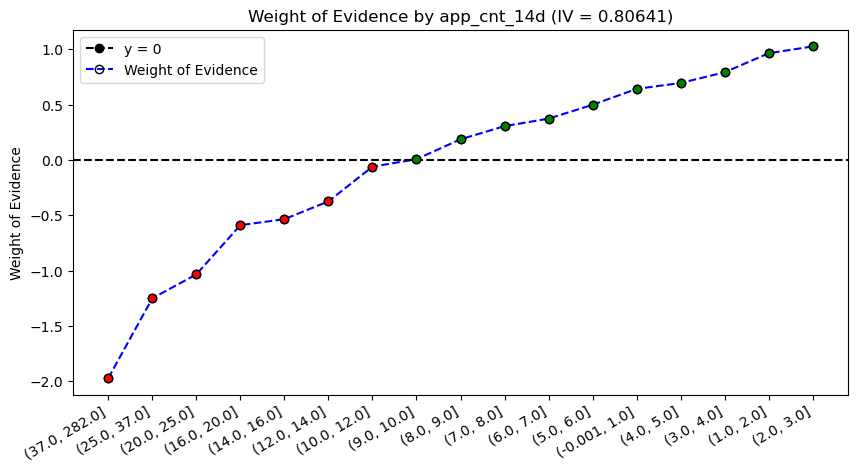

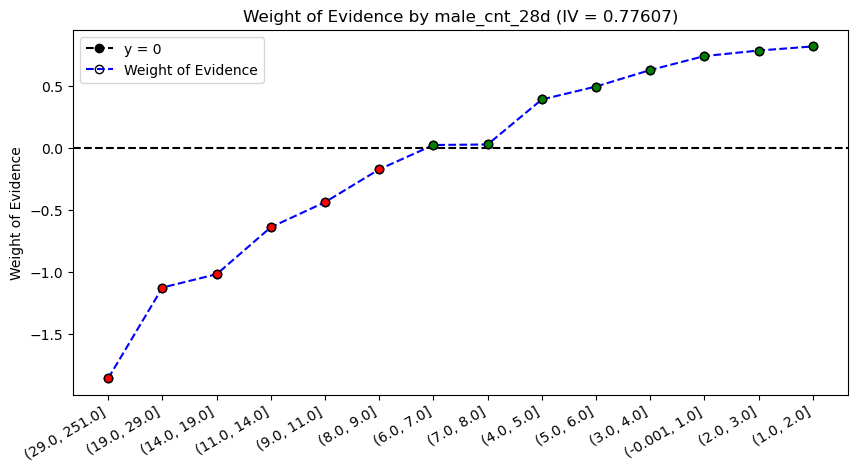

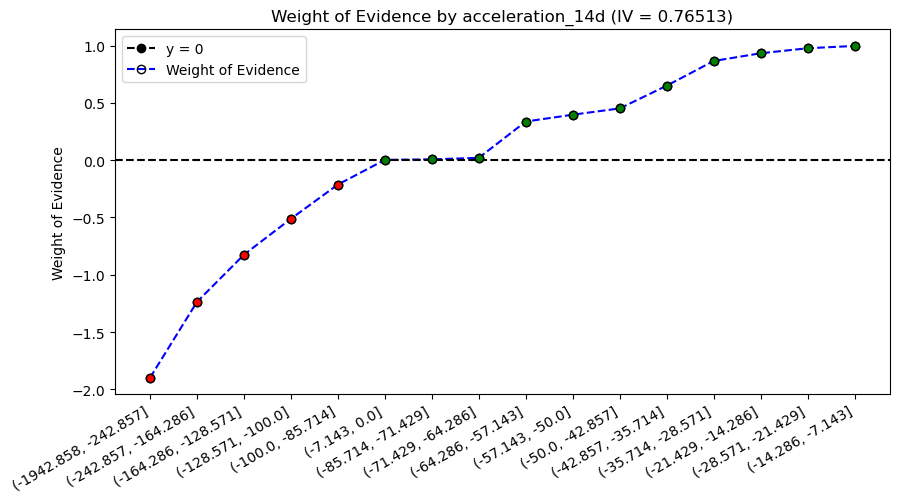

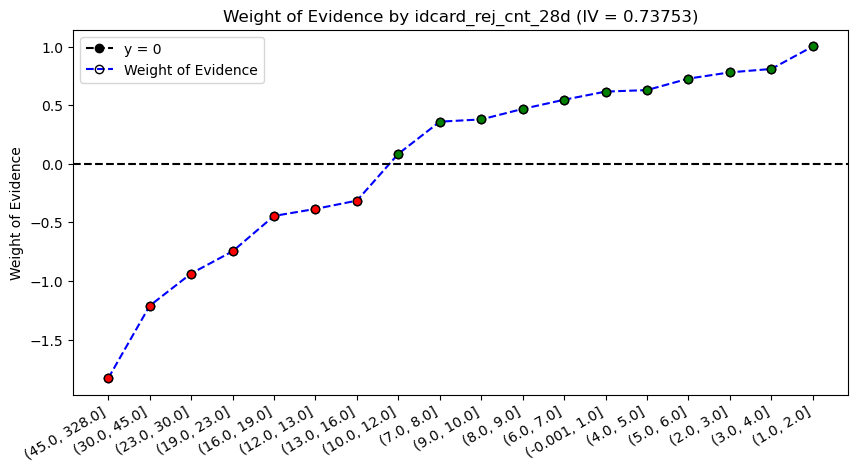

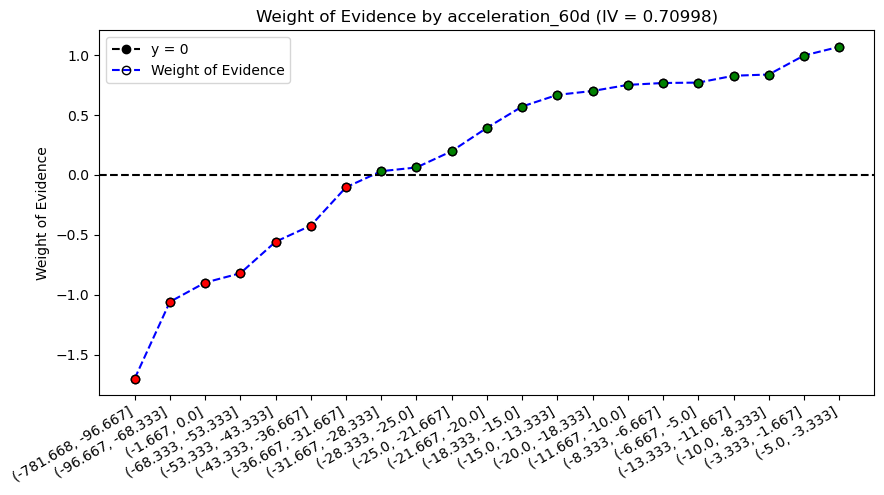

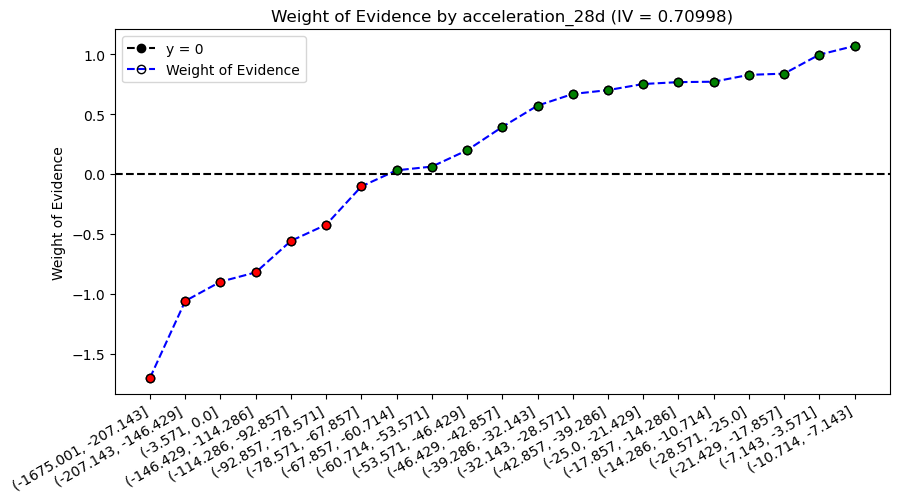

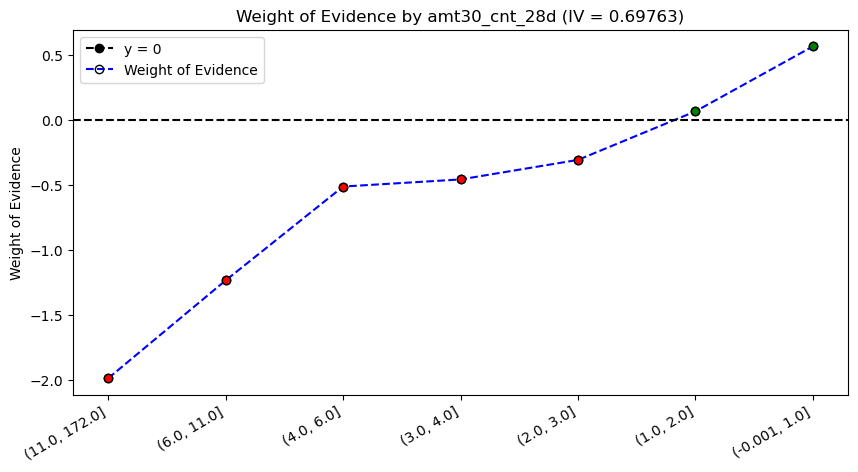

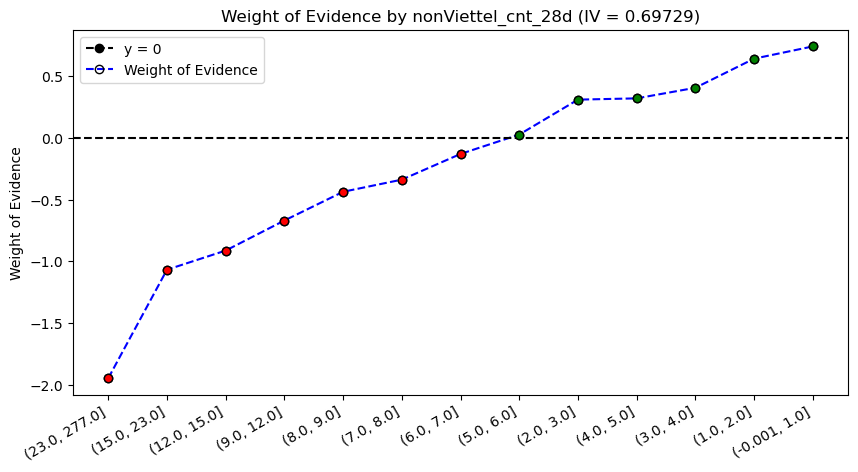

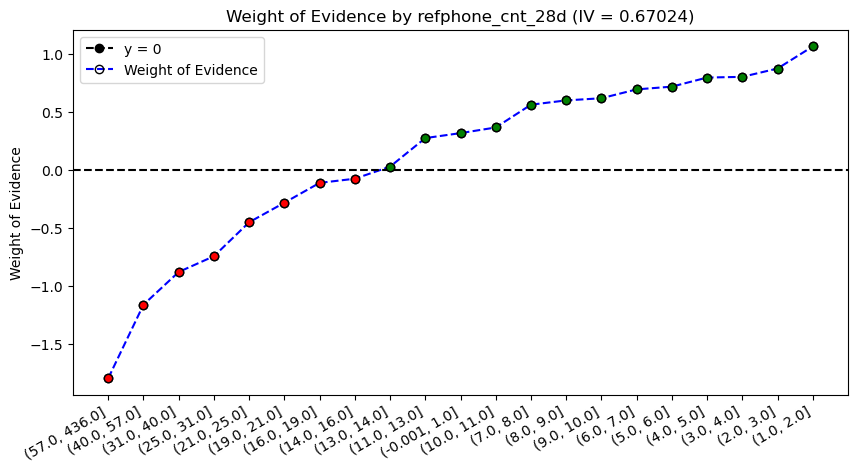

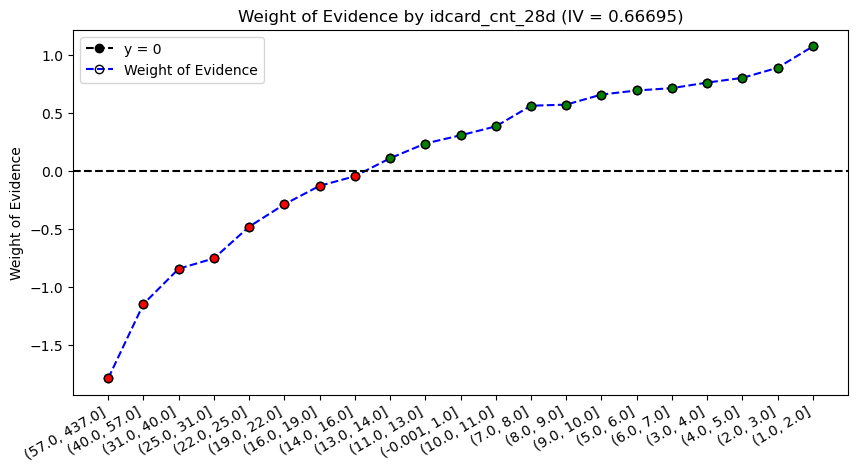

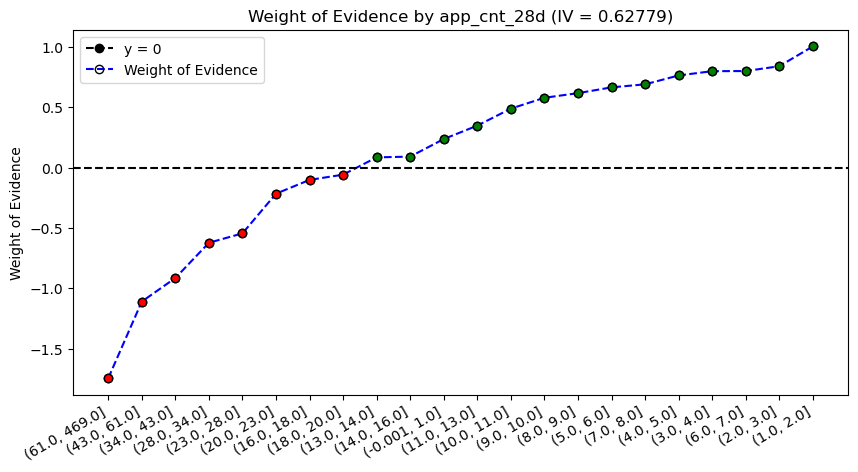

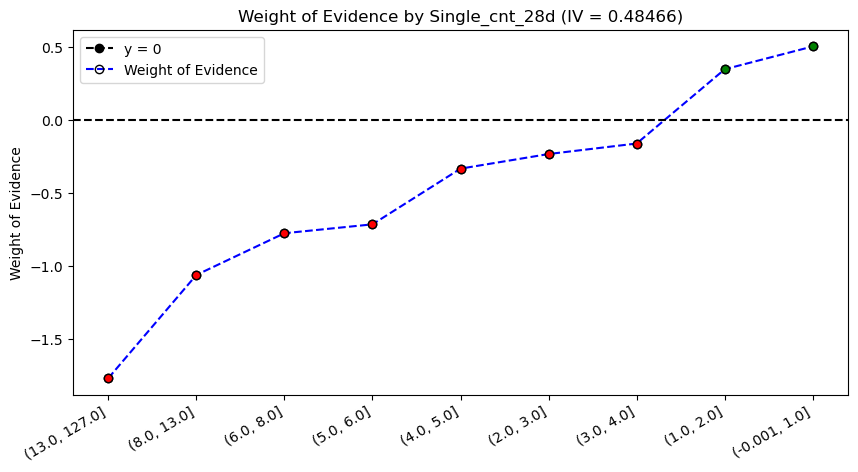

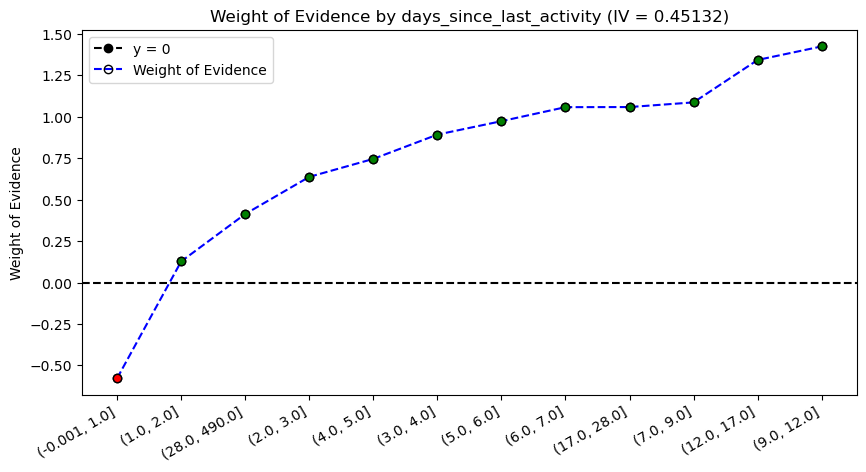

In [42]:
df_continuous_IV_gt_02 = df_continuous[(df_continuous['IV_ADJUSTED'] > 0.25) & (df_continuous['IV_ADJUSTED'] < 0.9)]

for i in range(len(df_continuous_IV_gt_02)):
    col = df_continuous_IV_gt_02.iloc[i]['CONTINUOUS_COL']
    bins = df_continuous_IV_gt_02.iloc[i]['BINS']
    loan_data[col + '_bin'] = pd.cut(loan_data[col], bins)
    print(col, 'binned!')

for col in df_continuous_IV_gt_02['CONTINUOUS_COL']:
    results = woe_continuous_best_class_count(loan_data, col)
    woe_results = results[1]
    plot_by_woe(woe_results)

In [43]:
df_continuous_IV_gt_02

,CONTINUOUS_COL,BEST_CUT,IV,IV_ADJUSTED,BINS
3,app_cnt_14d,29,0.806412,0.806412,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
4,male_cnt_28d,26,0.776071,0.776071,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
5,acceleration_14d,29,0.765128,0.765128,"[-1942.8571428571427, -242.85714285714283, -16..."
6,idcard_rej_cnt_28d,28,0.737533,0.737533,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
7,acceleration_60d,29,0.709982,0.709982,"[-781.6666666666666, -96.66666666666669, -68.3..."
8,acceleration_28d,29,0.709982,0.709982,"[-1675.0, -207.1428571428572, -146.42857142857..."
9,amt30_cnt_28d,25,0.697629,0.697629,"[0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 11.0, 172.0]"
10,nonViettel_cnt_28d,29,0.697291,0.697291,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
11,refphone_cnt_28d,29,0.670242,0.670242,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
12,idcard_cnt_28d,29,0.666954,0.666954,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."


In [44]:
# List of columns you're interested in
interested_cols = ['app_cnt_14d','male_cnt_28d','acceleration_14d','idcard_rej_cnt_28d','acceleration_60d','acceleration_28d','amt30_cnt_28d','nonViettel_cnt_28d','refphone_cnt_28d','idcard_cnt_28d','app_cnt_28d','Single_cnt_28d','days_since_last_activity']
# ['male_cnt_28d', 'stable_and_self_employed_rate_cnt_28d', 
#                    'refphone_cnt_28d', 'idcard_cnt_28d',
#                    'idcard_rej_cnt_28d','outSideAppPermanent_cnt_28d','app_cnt_28d',
#                    'acceleration_28d','acceleration_60d','nonViettel_cnt_28d','term_permanent_flag_cnt_28d',
#                    'outSideApp_cnt_28d', 'approve_cnt_28d', 'velocity_28d', 
#                    'userTriggerNew_cnt_28d','addressTrigger_cnt_28d', 'velocity_60d', 'velocity_14d', 'amt30_cnt_28d']

app_cnt_14d binned!
male_cnt_28d binned!
acceleration_14d binned!
idcard_rej_cnt_28d binned!
acceleration_60d binned!
acceleration_28d binned!
amt30_cnt_28d binned!
nonViettel_cnt_28d binned!
refphone_cnt_28d binned!
idcard_cnt_28d binned!
app_cnt_28d binned!
Single_cnt_28d binned!
days_since_last_activity binned!


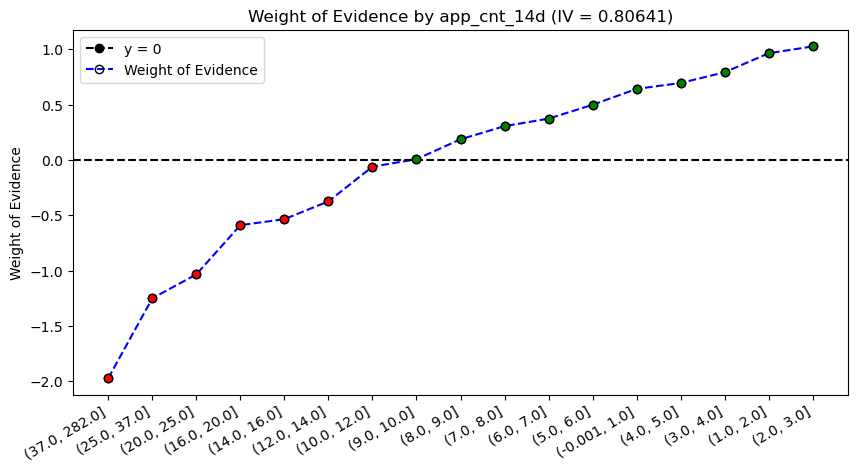

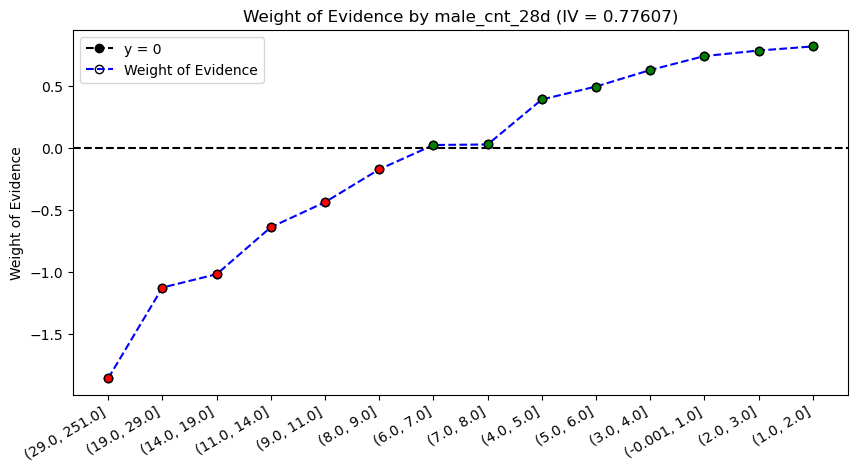

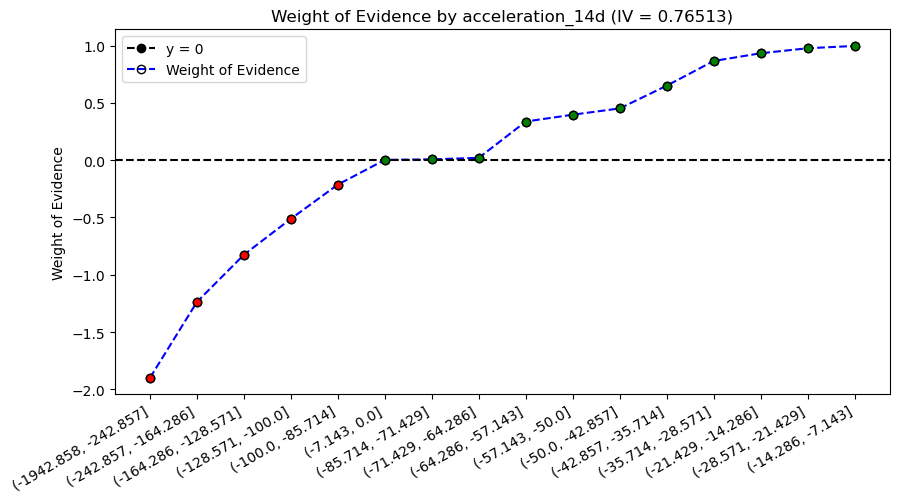

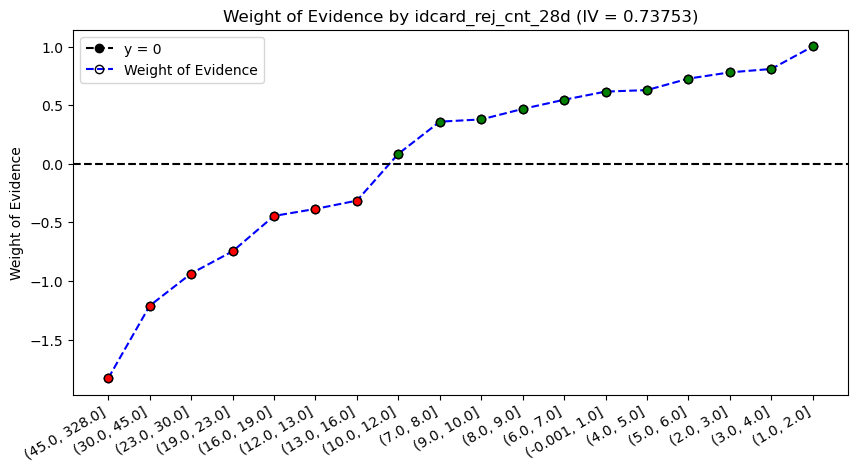

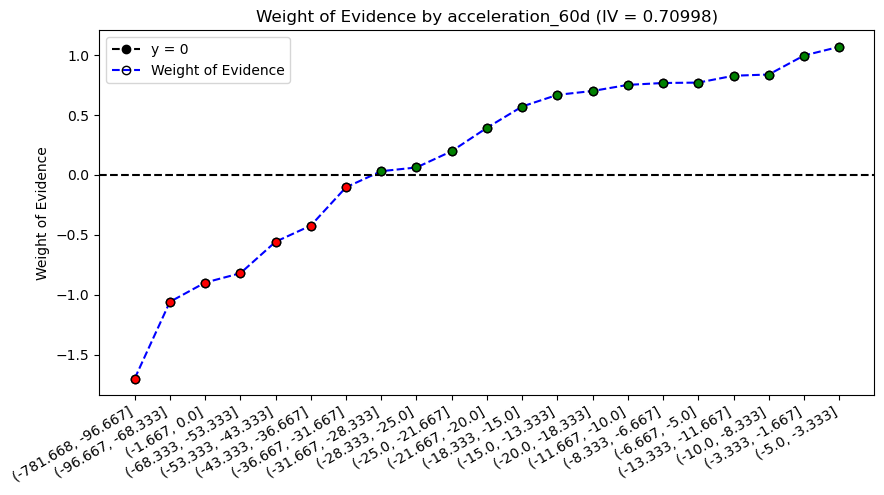

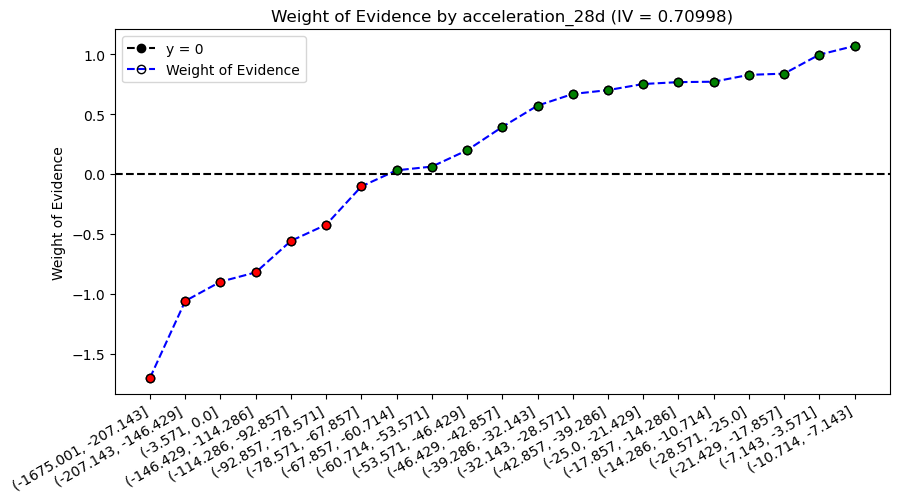

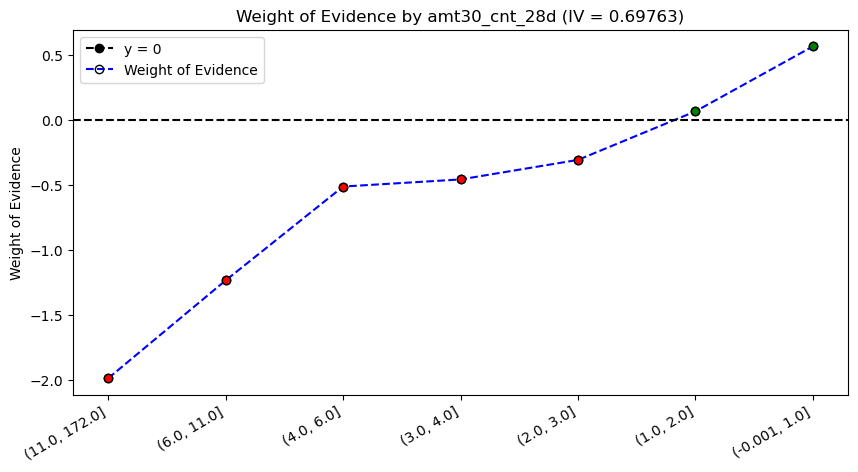

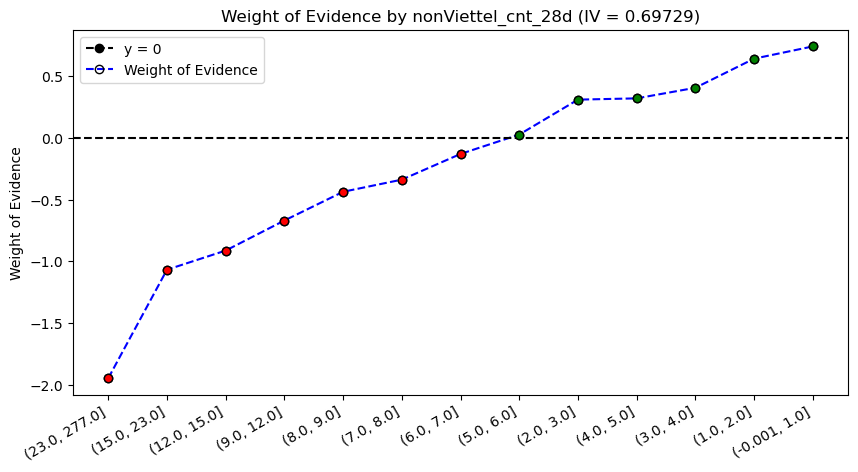

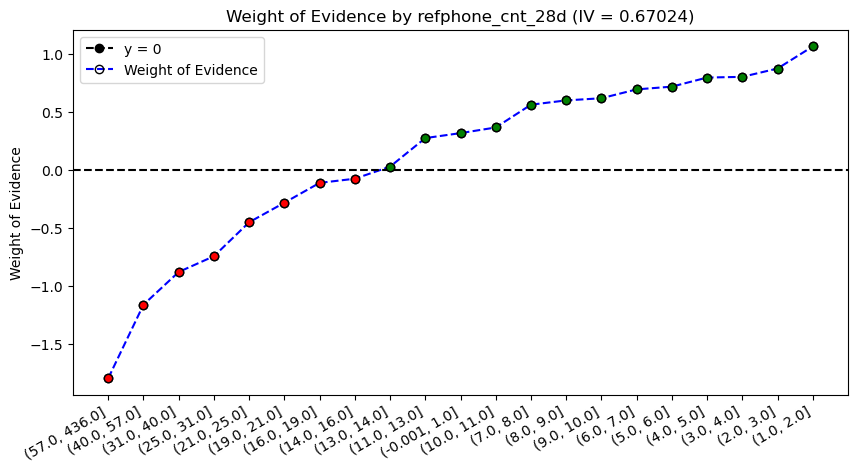

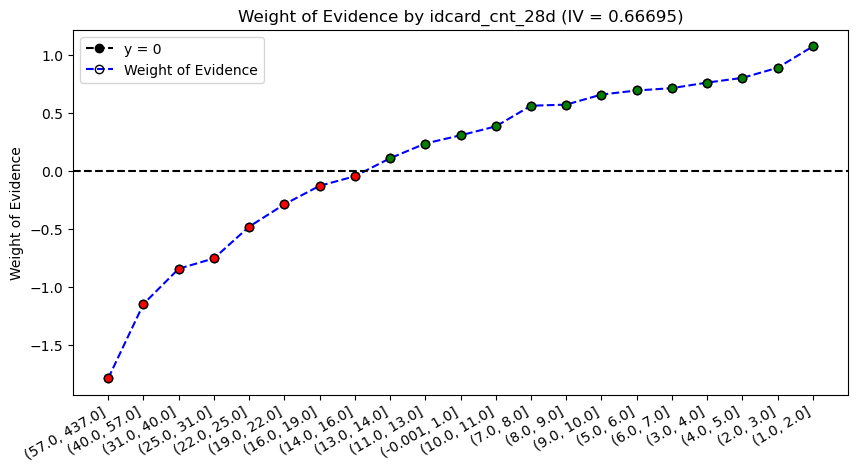

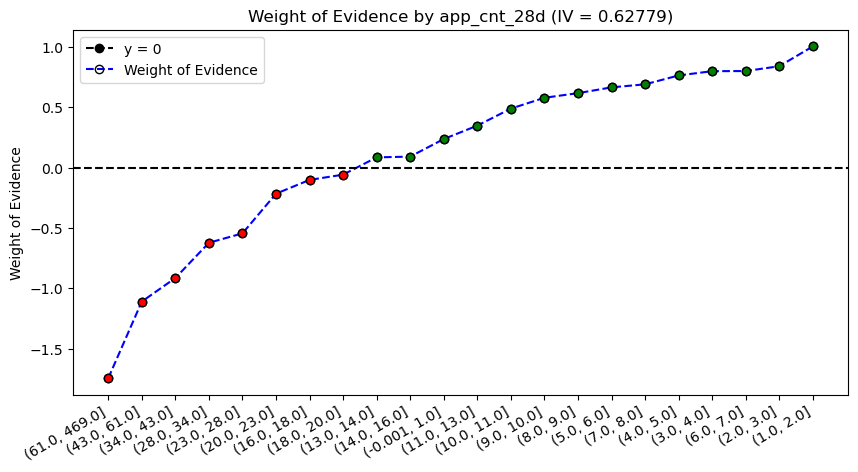

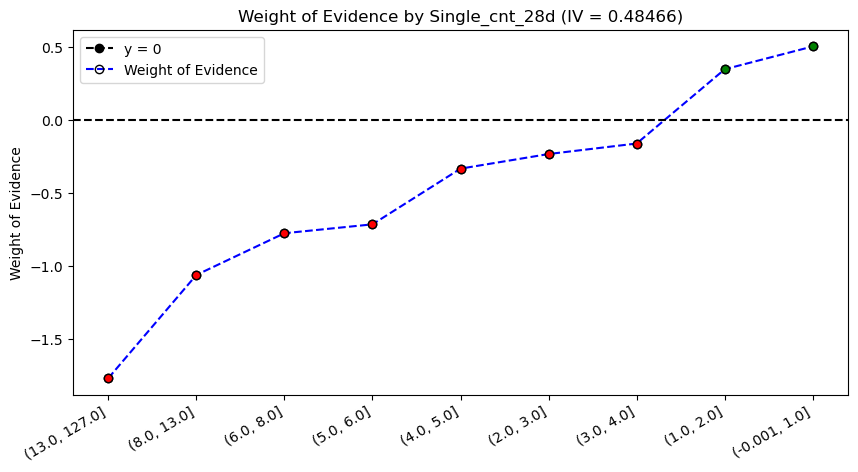

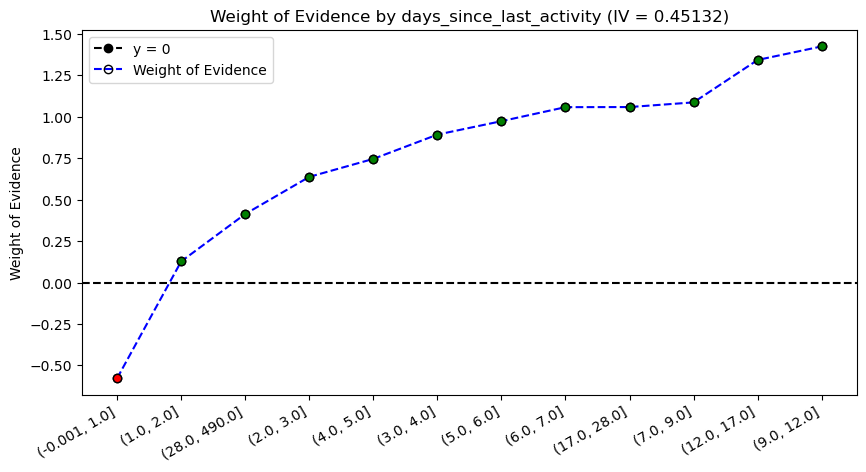

In [45]:
# It seems you want to filter your DataFrame to specific rows, not columns. 
# We assume you want to keep rows where 'CONTINUOUS_COL' is in your list of interests.
df_continuous_IV_gt_02 = df_continuous[df_continuous['CONTINUOUS_COL'].isin(interested_cols)]

# Now, you're binning each selected continuous variable and adding it as a new column in loan_data
for i in range(len(df_continuous_IV_gt_02)):
    col = df_continuous_IV_gt_02.iloc[i]['CONTINUOUS_COL']
    bins = df_continuous_IV_gt_02.iloc[i]['BINS']
    
    # Create a new binned column in the loan_data DataFrame
    loan_data[col + '_bin'] = pd.cut(loan_data[col], bins)
    print(f"{col} binned!")  # Using f-strings for better readability

# For each column, you're now recalculating WoE and plotting it
for col in df_continuous_IV_gt_02['CONTINUOUS_COL']:
    # Since you're recalculating WoE, it seems unnecessary because you already have this information from earlier.
    # However, if it's intentional (maybe your data has updated), you can proceed as follows.
    results = woe_continuous_best_class_count(loan_data, col)
    woe_results = results[1]  # I'm assuming this is a DataFrame with WoE values
    
    # Now, you want to plot the WoE values. I assume plot_by_woe is a predefined function that accepts a DataFrame.
    plot_by_woe(woe_results)

In [46]:
selected_continuous_cols1 = df_continuous_IV_gt_02['CONTINUOUS_COL'].tolist()
selected_continuous_cols1 = [x + '_bin' for x in selected_continuous_cols1]
selected_continuous_cols1

['app_cnt_14d_bin',
 'male_cnt_28d_bin',
 'acceleration_14d_bin',
 'idcard_rej_cnt_28d_bin',
 'acceleration_60d_bin',
 'acceleration_28d_bin',
 'amt30_cnt_28d_bin',
 'nonViettel_cnt_28d_bin',
 'refphone_cnt_28d_bin',
 'idcard_cnt_28d_bin',
 'app_cnt_28d_bin',
 'Single_cnt_28d_bin',
 'days_since_last_activity_bin']

In [47]:
selected_continuous_cols = selected_continuous_cols1
selected_continuous_cols

['app_cnt_14d_bin',
 'male_cnt_28d_bin',
 'acceleration_14d_bin',
 'idcard_rej_cnt_28d_bin',
 'acceleration_60d_bin',
 'acceleration_28d_bin',
 'amt30_cnt_28d_bin',
 'nonViettel_cnt_28d_bin',
 'refphone_cnt_28d_bin',
 'idcard_cnt_28d_bin',
 'app_cnt_28d_bin',
 'Single_cnt_28d_bin',
 'days_since_last_activity_bin']

In [48]:
# Clean up data
discrete_cols = ['region_tier','app_cnt_14d_bin',
 'male_cnt_28d_bin',
 'acceleration_14d_bin',
 'idcard_rej_cnt_28d_bin',
 'acceleration_60d_bin',
 'acceleration_28d_bin',
 'amt30_cnt_28d_bin',
 'nonViettel_cnt_28d_bin',
 'refphone_cnt_28d_bin',
 'idcard_cnt_28d_bin',
 'app_cnt_28d_bin',
 'Single_cnt_28d_bin',
 'days_since_last_activity_bin']
# Characteristic variable isolation
# Fill 0
spe_num = loan_data.select_dtypes(['float', 'int']).columns
loan_data[spe_num] = loan_data[spe_num].apply(lambda x: x.fillna(0), axis=0)
# Fill missing values
spe_obj = loan_data.select_dtypes(['object']).columns
loan_data[spe_obj] = loan_data[spe_obj].apply(lambda x: x.fillna('NaN'), axis=0)

for col in discrete_cols:
    results = woe_discrete(loan_data, col)
    col_woe = col + '_WOE'
    loan_data[col_woe] = loan_data[col].map(results.set_index(col)['WoE'])

In [49]:
# Train/test split
category_columns = loan_data.select_dtypes(include='category')
category_columns = category_columns.columns
# Assuming your DataFrame is named 'df' and the column to convert is 'category_column'
loan_data[category_columns] = loan_data[category_columns].astype('object')

X = loan_data.filter(like='_WOE', axis = 1)
y = loan_data['BAD']
X = X.fillna(0)

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True, random_state = 19)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (136014, 14)
X_test shape:  (34004, 14)
y_train shape:  (136014,)
y_test shape:  (34004,)


In [50]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
from sklearn.metrics import precision_score,recall_score,f1_score

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# log_reg = LogisticRegression()  # Initialize a Logistic Regression model
undersample_X, undersample_y = rus.fit_resample(X_train, y_train)
# undersample_X, undersample_y = X_train, y_train  # Assuming undersample data comes from your train data

# StratifiedKFold with random_state
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

undersample_X = undersample_X.values
undersample_y = undersample_y.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
nearmiss = NearMiss()

# Set the random state of your Logistic Regression model
log_reg = LogisticRegression(random_state=42)  # Initialize a Logistic Regression model

# ...

# Cross Validating the right way
for train, test in sss.split(undersample_X, undersample_y):
    undersample_pipeline = imbalanced_make_pipeline(nearmiss, log_reg)  # NearMiss happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    undersample_prediction = undersample_model.predict(undersample_X[test])
    
    # ... rest of the code remains unchanged

    undersample_accuracy.append(undersample_pipeline.score(undersample_X[test], undersample_y[test]))
    undersample_precision.append(precision_score(undersample_y[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_y[test], undersample_prediction))

X_nearmiss, y_nearmiss = nearmiss.fit_resample(undersample_X, undersample_y)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

NearMiss Label Distribution: Counter({0: 3710, 1: 3710})


In [51]:
classifiers = [
    ("Logistic Regression", log_reg)
]

In [52]:
for classifier_name, classifier in classifiers:
    classifier.fit(X_nearmiss, y_nearmiss)
    training_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=2, scoring='accuracy')
    precision_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=2, scoring='precision')
    recall_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=2, scoring='recall')
    
    print(f"Classifier: {classifier_name}")
    print(f"  Accuracy: {round(training_scores.mean() * 100, 2)}%")
    print(f"  Precision: {round(precision_scores.mean() * 100, 2)}%")
    print(f"  Recall: {round(recall_scores.mean() * 100, 2)}%")
    print()


Classifier: Logistic Regression
  Accuracy: 69.66%
  Precision: 72.65%
  Recall: 62.91%



In [53]:
# Apply NearMiss to Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-validator with random_state set
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=cv)
grid_log_reg.fit(X_nearmiss, y_nearmiss)
log_reg = grid_log_reg.best_estimator_
print('Best Estimator for Logistic Regression:', log_reg)


Best Estimator for Logistic Regression: LogisticRegression(C=10, random_state=42)


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate evaluation metrics for the undersampling technique
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []

for train, test in sss.split(undersample_X, undersample_y):
    undersample_pipeline = imbalanced_make_pipeline(nearmiss, log_reg)
    undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    undersample_prediction = undersample_model.predict(undersample_X[test])
    
    undersample_accuracy.append(accuracy_score(undersample_y[test], undersample_prediction))
    undersample_precision.append(precision_score(undersample_y[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y[test], undersample_prediction))

# Calculate evaluation metrics for overfitting (without undersampling)
y_pred = log_reg.predict(X_train)
overfitting_recall = recall_score(y_train, y_pred)
overfitting_precision = precision_score(y_train, y_pred)
overfitting_f1 = f1_score(y_train, y_pred)
overfitting_accuracy = accuracy_score(y_train, y_pred)

# Create a DataFrame for the results
temp_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Undersampling Technique': [np.mean(undersample_accuracy), np.mean(undersample_precision),
                                 np.mean(undersample_recall), np.mean(undersample_f1)],
    'Overfitting (without Undersampling)': [overfitting_accuracy, overfitting_precision,
                                             overfitting_recall, overfitting_f1]
})

# Print the DataFrame
temp_df


,Metric,Undersampling Technique,Overfitting (without Undersampling)
0,Accuracy,0.749191,0.780251
1,Precision,0.763237,0.084922
2,Recall,0.722911,0.721833
3,F1 Score,0.742410,0.151965


In [55]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, cohen_kappa_score, matthews_corrcoef, precision_recall_curve

# Calculate additional evaluation metrics
auc_roc = roc_auc_score(undersample_y[test], undersample_prediction)
conf_matrix = confusion_matrix(undersample_y[test], undersample_prediction)
class_report = classification_report(undersample_y[test], undersample_prediction)
kappa = cohen_kappa_score(undersample_y[test], undersample_prediction)
mcc = matthews_corrcoef(undersample_y[test], undersample_prediction)
precision, recall, _ = precision_recall_curve(undersample_y[test], undersample_prediction)

# Add the additional metrics to the DataFrame
temp_df['AUC-ROC'] = auc_roc
temp_df['Cohen\'s Kappa'] = kappa
temp_df['Matthews Correlation Coefficient'] = mcc

In [56]:
X.columns

Index(['region_tier_WOE', 'app_cnt_14d_bin_WOE', 'male_cnt_28d_bin_WOE',
       'acceleration_14d_bin_WOE', 'idcard_rej_cnt_28d_bin_WOE',
       'acceleration_60d_bin_WOE', 'acceleration_28d_bin_WOE',
       'amt30_cnt_28d_bin_WOE', 'nonViettel_cnt_28d_bin_WOE',
       'refphone_cnt_28d_bin_WOE', 'idcard_cnt_28d_bin_WOE',
       'app_cnt_28d_bin_WOE', 'Single_cnt_28d_bin_WOE',
       'days_since_last_activity_bin_WOE'],
      dtype='object')

In [57]:
# Logistic Regression with Under-Sampling
beta_coeffs_undersample = log_reg.coef_
data_undersample = {'Feature': X_train.columns, 'Beta Coefficient (Under-Sampling)': beta_coeffs_undersample[0]}
df_undersample = pd.DataFrame(data_undersample)

In [58]:
print("Beta Coefficients (Logistic Regression with Under-Sampling):")
df_undersample

Beta Coefficients (Logistic Regression with Under-Sampling):


,Feature,Beta Coefficient (Under-Sampling)
0,region_tier_WOE,-0.729986
1,app_cnt_14d_bin_WOE,-1.236352
2,male_cnt_28d_bin_WOE,-0.249967
3,acceleration_14d_bin_WOE,0.726980
4,idcard_rej_cnt_28d_bin_WOE,-0.312590
5,acceleration_60d_bin_WOE,-0.351263
6,acceleration_28d_bin_WOE,-0.351263
7,amt30_cnt_28d_bin_WOE,-0.287086
8,nonViettel_cnt_28d_bin_WOE,-0.102595
9,refphone_cnt_28d_bin_WOE,-1.269689


In [59]:
intercept  = log_reg.intercept_[0]
intercept

-0.009997580715157342

In [60]:
loan_data.head()

,region_tier,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,idcard_rej_cnt_28d,Single_cnt_28d,nonViettel_cnt_28d,male_cnt_28d,idcard_cnt_28d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_28d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,amt30_cnt_28d,outSideApp_cnt_1d,velocity_outSideApp_cnt_7d,velocity_outSideApp_cnt_14d,velocity_outSideApp_cnt_28d,acceleration_outSideApp_7d,acceleration_outSideApp_14d,acceleration_outSideApp_28d,outSideAppPermanent_cnt_1d,velocity_outSideAppPermanent_cnt_7d,velocity_outSideAppPermanent_cnt_14d,velocity_outSideAppPermanent_cnt_28d,acceleration_outSideAppPermanent_cnt_7d,acceleration_outSideAppPermanent_cnt_14d,acceleration_outSideAppPermanent_cnt_28d,day_of_week,day_of_month,month,quarter,year,days_since_last_activity,BAD,app_cnt_14d_bin,male_cnt_28d_bin,acceleration_14d_bin,idcard_rej_cnt_28d_bin,acceleration_60d_bin,acceleration_28d_bin,amt30_cnt_28d_bin,nonViettel_cnt_28d_bin,refphone_cnt_28d_bin,idcard_cnt_28d_bin,app_cnt_28d_bin,Single_cnt_28d_bin,days_since_last_activity_bin,region_tier_WOE,app_cnt_14d_bin_WOE,male_cnt_28d_bin_WOE,acceleration_14d_bin_WOE,idcard_rej_cnt_28d_bin_WOE,acceleration_60d_bin_WOE,acceleration_28d_bin_WOE,amt30_cnt_28d_bin_WOE,nonViettel_cnt_28d_bin_WOE,refphone_cnt_28d_bin_WOE,idcard_cnt_28d_bin_WOE,app_cnt_28d_bin_WOE,Single_cnt_28d_bin_WOE,days_since_last_activity_bin_WOE
0,TIER_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-3.571429,-1.666667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,2,11,4,2022,0.0,0,NaN,"(0.0, 1.0]","(-7.143, 0.0]","(0.0, 1.0]","(-3.333, -1.667]","(-7.143, -3.571]",NaN,"(0.0, 1.0]","(0.0, 1.0]","(0.0, 1.0]","(0.0, 1.0]",NaN,NaN,0.932206,NaN,1.081666,0.002188,1.131132,0.995317,0.995317,NaN,0.9955,1.032846,1.016192,0.983495,NaN,NaN
1,TIER_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-3.571429,-1.666667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3,17,11,4,2022,15.0,0,NaN,"(0.0, 1.0]","(-7.143, 0.0]","(0.0, 1.0]","(-3.333, -1.667]","(-7.143, -3.571]",NaN,"(0.0, 1.0]","(0.0, 1.0]","(0.0, 1.0]","(0.0, 1.0]",NaN,"(12.0, 17.0]",0.932206,NaN,1.081666,0.002188,1.131132,0.995317,0.995317,NaN,0.9955,1.032846,1.016192,0.983495,NaN,1.325709
2,TIER_1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,2,2,2,2,0,1,1,1,2,2,0.0,-0.333333,0.0,0.0,0.0,0.0,1,-0.142857,-7.142857,-7.142857,-3.333333,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,5,19,11,4,2022,2.0,0,"(0.0, 1.0]","(1.0, 2.0]","(-14.286, -7.143]","(0.0, 1.0]","(-5.0, -3.333]","(-10.714, -7.143

In [61]:
selected_cols = X.columns
# Convert selected columns to string data type
loan_data[selected_cols] = loan_data[selected_cols].astype(str)

# Fill NaN values with the least popular category in each column
for col in selected_cols:
    least_popular = loan_data[col].value_counts().idxmin()  # Get the least popular category
    loan_data[col].fillna(least_popular, inplace=True)

In [62]:
# Store the WoE DataFrames in a dictionary
woe_results = {}

for col in selected_cols:
    # Call woe_discrete function and store the resulting DataFrame in the dictionary
    woe_results[col] = woe_discrete(loan_data, col)

# Extract the coefficients into a dictionary
coeff_dict = df_undersample.set_index('Feature')['Beta Coefficient (Under-Sampling)'].to_dict()

# Debug: Print coeff_dict
print("Coefficients: ", coeff_dict)

# Scaling factor, typically set to PDO (Points to Double the Odds) / log(2)
factor = 20 / np.log(2)
offset = 600  # Example base score, you can choose a different value

# Debug: Print intercept
print("Intercept: ", intercept)

# Building the scorecard
scorecard = pd.DataFrame()

for col in X.columns:
    # Ensure woe_results is a dictionary with DataFrames containing WoE values for each variable
    woe_df = woe_results[col]

    # Debug: Print WoE values
    print(f"WoE values for {col}:")
    print(woe_df['WoE'])
    
    # Calculate score for this variable using WoE and the logistic regression coefficient
    coef = coeff_dict.get(col, 0)

    # Debug: Print coefficient
    print(f"Coefficient for {col}: {coef}")

    scores = woe_df['WoE'] * coef * factor

    # Replace NaN and infinite scores with the mean of the scores
    scores.replace([np.inf, -np.inf], np.nan, inplace=True)
    scores.fillna(scores.mean(), inplace=True)

    # Add the scores to the scorecard
    scorecard[col] = scores

# Sum the scores for each variable and add the intercept and offset to get the final score
scorecard['final_score'] = scorecard.sum(axis=1) + intercept * factor + offset

Coefficients:  {'region_tier_WOE': -0.7299859988815551, 'app_cnt_14d_bin_WOE': -1.236351998928447, 'male_cnt_28d_bin_WOE': -0.2499667781495214, 'acceleration_14d_bin_WOE': 0.7269795326393962, 'idcard_rej_cnt_28d_bin_WOE': -0.3125902778839629, 'acceleration_60d_bin_WOE': -0.3512633495178461, 'acceleration_28d_bin_WOE': -0.3512633495178461, 'amt30_cnt_28d_bin_WOE': -0.2870864974662181, 'nonViettel_cnt_28d_bin_WOE': -0.10259516046447784, 'refphone_cnt_28d_bin_WOE': -1.2696890304790331, 'idcard_cnt_28d_bin_WOE': -0.10542366935524518, 'app_cnt_28d_bin_WOE': 2.5980133979936157, 'Single_cnt_28d_bin_WOE': -0.07528662672413394, 'days_since_last_activity_bin_WOE': -0.4811592031472977}
Intercept:  -0.009997580715157342
WoE values for region_tier_WOE:
0   -1.333857
1   -1.069796
2   -0.459230
3    0.932206
Name: WoE, dtype: float64
Coefficient for region_tier_WOE: -0.7299859988815551
WoE values for app_cnt_14d_bin_WOE:
0    -1.972173
1    -1.250149
2    -1.034017
3    -0.589039
4    -0.534827
5   

In [63]:
# Create empty lists to store the data
feature_list = []
bin_list = []
woe_adjusted_list = []

# Iterate over the dictionary items
for feature, df in woe_results.items():
    # Extract the data from the DataFrame
    bins = df.iloc[:, 0].astype(str)  # Assuming the bins are in the second column
    woe = df['WoE']

    # Replace -inf values with a large negative value (e.g., -9999)
    woe = np.where(np.isinf(woe), -9999, woe)

    # Calculate the adjusted WoE
    woe_adjusted = woe * 1.2  # Adjust the WoE calculation as per your requirement

    # Append the data to the lists
    feature_list.extend([feature] * len(bins))
    bin_list.extend(bins)
    woe_adjusted_list.extend(woe_adjusted)

# Create the DataFrame
woe_df = pd.DataFrame({'features': feature_list, 'bins': bin_list, 'WoE_adjusted': woe_adjusted_list})

# Print the resulting DataFrame
woe_df


,features,bins,WoE_adjusted
0,region_tier_WOE,-1.333857178094007,-1.600629
1,region_tier_WOE,-1.0697955234963656,-1.283755
2,region_tier_WOE,-0.4592299728366366,-0.551076
3,region_tier_WOE,0.9322059476117334,1.118647
4,app_cnt_14d_bin_WOE,-1.9471307089168115,-2.366608
5,app_cnt_14d_bin_WOE,-1.2251063070966948,-1.500178
6,app_cnt_14d_bin_WOE,-1.0089751114814824,-1.240821
7,app_cnt_14d_bin_WOE,-0.5639971881899897,-0.706847
8,app_cnt_14d_bin_WOE,-0.5097848514279893,-0.641792
9,app_cnt_14d_bin_WOE,-0.34914474701787374,-0.449024


In [64]:
# Extract the coefficients into a dictionary
coeff_dict = df_undersample.set_index('Feature')['Beta Coefficient (Under-Sampling)'].to_dict()

# Scaling factor, typically set to PDO (Points to Double the Odds) / log(2)
factor = 20 / np.log(2)
offset = 600  # Example base score, you can choose a different value


In [65]:
# Build the initial data for the scorecard
feature_list = []
bin_list = []
woe_list = []
score_list = []

# Iterate over the WoE results
for feature, df in woe_results.items():
    bins = df.iloc[:, 0].astype(str)  # Assuming the bins are in the first column of the DataFrame
    woe = df['WoE']
    coeff = coeff_dict.get(feature)  # Get the coefficient for the current feature from the dictionary
    
    # Calculate scores for each bin
    # Calculate scores for each bin
    scores = ((0 - woe) * coeff * factor)

    
    # Append the data to the lists
    feature_list.extend([feature] * len(bins))
    bin_list.extend(bins)
    woe_list.extend(woe)
    score_list.extend(scores)

# Calculate the base score
base_score = offset - (intercept * factor)

# Create the scorecard DataFrame
scorecard = pd.DataFrame({'Feature': feature_list, 'Bin': bin_list, 'WoE': woe_list, 'Score': score_list})

# Adding the base score as the last row
scorecard = scorecard.append({'Feature': 'Base Score', 'Bin': None, 'WoE': None, 'Score': base_score}, ignore_index=True)

In [66]:
scorecard

,Feature,Bin,WoE,Score
0,region_tier_WOE,-1.333857178094007,-1.333857,-28.094959
1,region_tier_WOE,-1.0697955234963656,-1.069796,-22.533043
2,region_tier_WOE,-0.4592299728366366,-0.459230,-9.672735
3,region_tier_WOE,0.9322059476117334,0.932206,19.635001
4,app_cnt_14d_bin_WOE,-1.9471307089168115,-1.972173,-70.354465
5,app_cnt_14d_bin_WOE,-1.2251063070966948,-1.250149,-44.597271
6,app_cnt_14d_bin_WOE,-1.0089751114814824,-1.034017,-36.887098
7,app_cnt_14d_bin_WOE,-0.5639971881899897,-0.589039,-21.013143
8,app_cnt_14d_bin_WOE,-0.5097848514279893,-0.534827,-19.079195
9,app_cnt_14d_bin_WOE,-0.34914474701787374,-0.374187,-13.348588


In [67]:
# Assuming your DataFrame is named 'df'
category_columns = loan_data.select_dtypes(include='category')
category_columns = category_columns.columns
# Assuming your DataFrame is named 'df' and the column to convert is 'category_column'
loan_data[category_columns] = loan_data[category_columns].astype('object')

In [68]:
def preprocess_scorecard(scorecard):
    # Preprocessing the scorecard to handle NaN values and proper binning
    processed_scorecard = []
    for _, score_row in scorecard.iterrows():
        feature = score_row['Feature']
        if feature == 'Base Score':
            continue
        bin_str = str(score_row['Bin'])
        if bin_str == 'nan':
            bin_values = np.nan
        elif '(' in bin_str and ')' in bin_str:
            bin_str = bin_str.replace('(', '').replace(']', '')
            bin_values = tuple(map(float, bin_str.split(',')))
        else:
            bin_values = bin_str
        processed_scorecard.append({'Feature': feature, 'Bin': bin_values, 'Score': score_row['Score']})
    return processed_scorecard

def calculate_individual_score(row, processed_scorecard, base_score):
    score = base_score
    for score_dict in processed_scorecard:
        feature = score_dict['Feature']
        value = row[feature]
        bin_values = score_dict['Bin']
        if isinstance(bin_values, tuple):
            if bin_values[0] < value <= bin_values[1]:
                score += score_dict['Score']
        elif pd.isna(bin_values) and pd.isna(value):
            score += score_dict['Score']
        else:
            if str(value) == bin_values:
                score += score_dict['Score']
    return score

# Preprocessing the scorecard
processed_scorecard = preprocess_scorecard(scorecard)

# Calculate the scores for each observation in loan_data
loan_data['Score'] = loan_data.apply(lambda x: calculate_individual_score(x, processed_scorecard, base_score), axis=1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


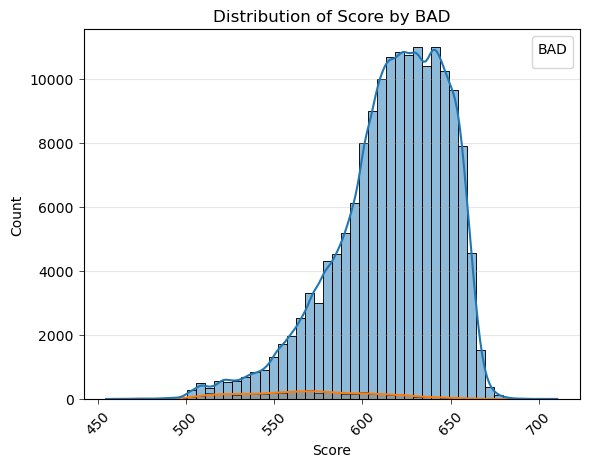

In [69]:
# Assuming you have a DataFrame called 'data' with columns 'score' and 'BAD'
sns.histplot(data=loan_data, x='Score', hue='BAD', kde=True, bins=50)

plt.title('Distribution of Score by BAD')
plt.xlabel('Score')
plt.ylabel('Count')

# Customize legend position and title
plt.legend(title='BAD', loc='upper right')

# Adjust the axis labels and tick marks
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='both', width=0.5)
plt.grid(axis='y', alpha=0.3)

plt.show()

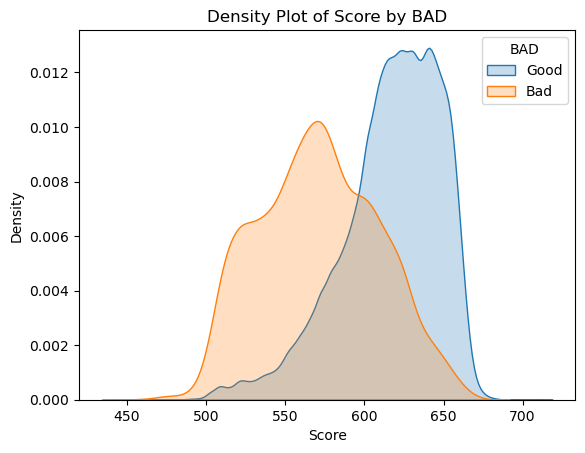

In [70]:
# Assuming you have a DataFrame called 'data' with columns 'Score' and 'BAD'
sns.kdeplot(data=loan_data[loan_data['BAD'] == 0], x='Score', fill=True, label='Good')
sns.kdeplot(data=loan_data[loan_data['BAD'] == 1], x='Score', fill=True, label='Bad')

plt.title('Density Plot of Score by BAD')
plt.xlabel('Score')
plt.ylabel('Density')

plt.legend(title='BAD')
plt.show()

In [71]:
# Identify columns that contain '_bin'
columns_to_drop = [col for col in loan_data.columns if '_bin' in col]

# Drop these columns
loan_data.drop(columns_to_drop, axis=1, inplace=True)
loan_data.head()

,region_tier,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,idcard_rej_cnt_28d,Single_cnt_28d,nonViettel_cnt_28d,male_cnt_28d,idcard_cnt_28d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_28d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,amt30_cnt_28d,outSideApp_cnt_1d,velocity_outSideApp_cnt_7d,velocity_outSideApp_cnt_14d,velocity_outSideApp_cnt_28d,acceleration_outSideApp_7d,acceleration_outSideApp_14d,acceleration_outSideApp_28d,outSideAppPermanent_cnt_1d,velocity_outSideAppPermanent_cnt_7d,velocity_outSideAppPermanent_cnt_14d,velocity_outSideAppPermanent_cnt_28d,acceleration_outSideAppPermanent_cnt_7d,acceleration_outSideAppPermanent_cnt_14d,acceleration_outSideAppPermanent_cnt_28d,day_of_week,day_of_month,month,quarter,year,days_since_last_activity,BAD,region_tier_WOE,Score
0,TIER_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-3.571429,-1.666667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,2,11,4,2022,0.0,0,0.9322059476117334,626.173173
1,TIER_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.000000,-3.571429,-1.666667,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3,17,11,4,2022,15.0,0,0.9322059476117334,644.804991
2,TIER_1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,2,2,2,2,0,1,1,1,2,2,0.0,-0.333333,0.0,0.0,0.0,0.0,1,-0.142857,-7.142857,-7.142857,-3.333333,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,5,19,11,4,2022,2.0,0,0.9322059476117334,648.988602
3,TIER_1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,0,3,3,3,3,0,0,1,2,3,3,0.0,0.000000,0.0,0.0,0.0,0.0,1,-0.142857,-14.285714,-10.714286,-5.000000,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4,25,11,4,2022,6.0,0,0.9322059476117334,651.800614
4,TIER_1,4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,1,4,4,4,4,0,0,1,3,4,4,0.0,0.000000,0.0,0.0,0.0,0.0,1,-0.142857,-21.428571,-14.285714,-6.666667,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,-0.142857,-0.071429,-0.035714,0,0.0,0.0,0.0,-0.142857,-0.071429,-0.035714,1,29,11,4,2022,4.0,0,0.9322059476117334,650.194199
